# Mitron Bank Customers demographic classification and their spending pattern analysis.


# Customers  segmentation using KMEANS clustering

# Importing libraries

In [352]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import functions to perform scaling and normalization
from sklearn.preprocessing import StandardScaler

# import various functions from sklearn 
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [353]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

# Loading Customer dataset

In [354]:
# importing customer datasets
df_cust = pd.read_csv("dim_customers.csv")
df_cust.head()

,customer_id,age_group,city,occupation,gender,marital status,avg_income
0,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523
1,ATQCUS0809,25-34,Hyderabad,Salaried Other Employees,Male,Married,39922
2,ATQCUS0663,25-34,Chennai,Salaried Other Employees,Male,Married,37702
3,ATQCUS0452,25-34,Delhi NCR,Government Employees,Male,Married,54090
4,ATQCUS3350,21-24,Bengaluru,Freelancers,Male,Single,28376


# Exploratory Data Analysis

In [355]:
df_cust.shape

(4000, 7)

In [356]:
df_cust.shape[0]

4000

In [357]:
df_cust.age_group.unique()

array(['45+', '25-34', '21-24', '35-45'], dtype=object)

In [358]:
df_cust.city.unique()

array(['Bengaluru', 'Hyderabad', 'Chennai', 'Delhi NCR', 'Mumbai'],
      dtype=object)

In [359]:
df_cust.occupation.unique()

array(['Salaried IT Employees', 'Salaried Other Employees',
       'Government Employees', 'Freelancers', 'Business Owners'],
      dtype=object)

In [360]:
df_cust.gender.unique()

array(['Male', 'Female'], dtype=object)

In [361]:
df_cust['marital status'].unique()

array(['Married', 'Single'], dtype=object)

In [362]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     4000 non-null   object
 1   age_group       4000 non-null   object
 2   city            4000 non-null   object
 3   occupation      4000 non-null   object
 4   gender          4000 non-null   object
 5   marital status  4000 non-null   object
 6   avg_income      4000 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 218.9+ KB


In [363]:
df_cust.isnull().sum()

customer_id       0
age_group         0
city              0
occupation        0
gender            0
marital status    0
avg_income        0
dtype: int64

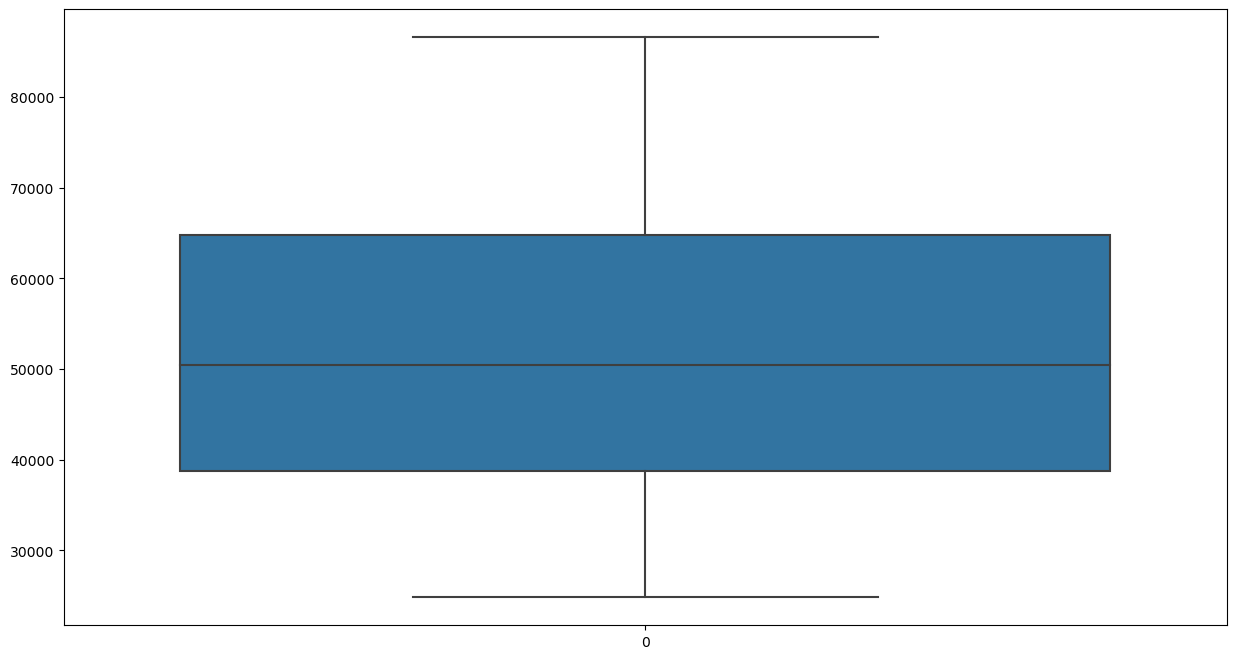

In [364]:
sns.boxplot(df_cust['avg_income'])

# display the plot
plt.show()

# Distribution of Numeric variable (avg_income)

<Axes: xlabel='avg_income', ylabel='Density'>

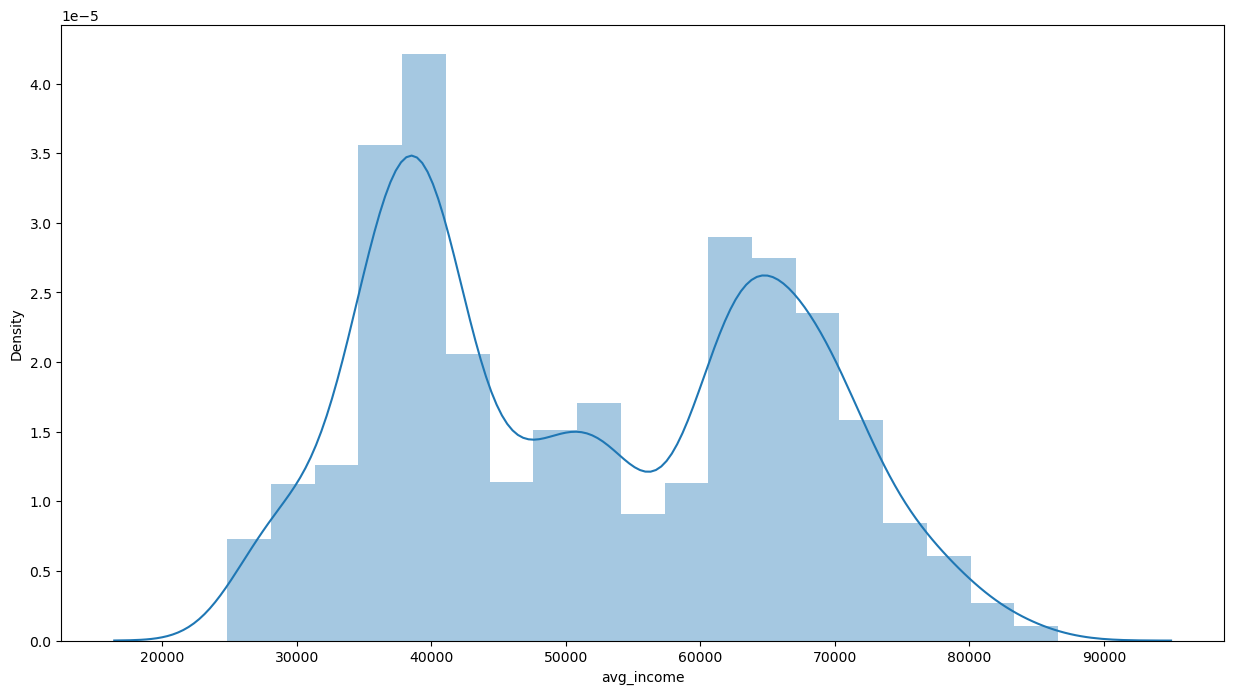

In [365]:
# Univariate analysis
sns.distplot(df_cust.avg_income)

# Distribution of Categorical variable

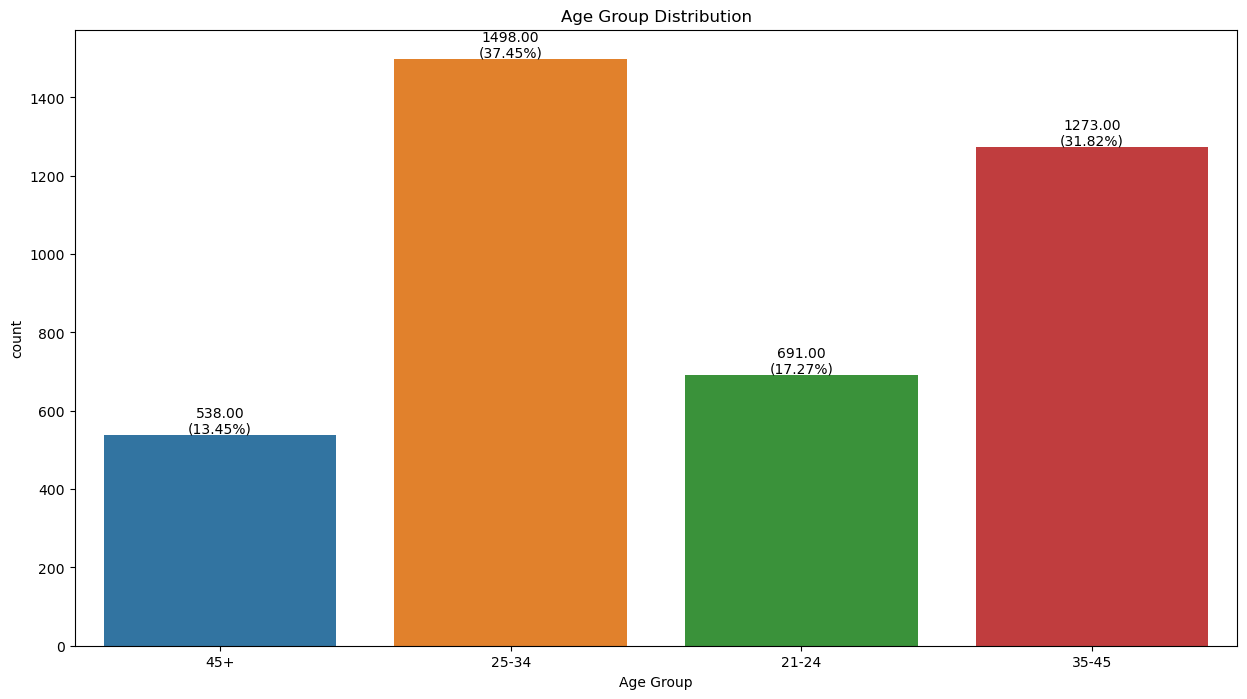

In [366]:
# value_counts of age_group
# Assuming df is your DataFrame and 'column_name' is the column you're counting
#plt.figure(figsize=(8, 7))
ax = sns.countplot(data=df_cust, x='age_group')
total_cnt = df_cust.shape[0]
# Annotate each bar with its count
for p in ax.patches:
    percentage = (p.get_height() / total_cnt) * 100
    ax.annotate(f'{p.get_height():.2f}\n({percentage:.2f}%)', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')


# Set labels and title
plt.xlabel('Age Group')

plt.title('Age Group Distribution')

# Show the plot
plt.show()




Interpretation: 37.45% of customers are of age group 25-34 and 31.82% are of age group 35-34. Ao these two age groups are dominant in this dataset

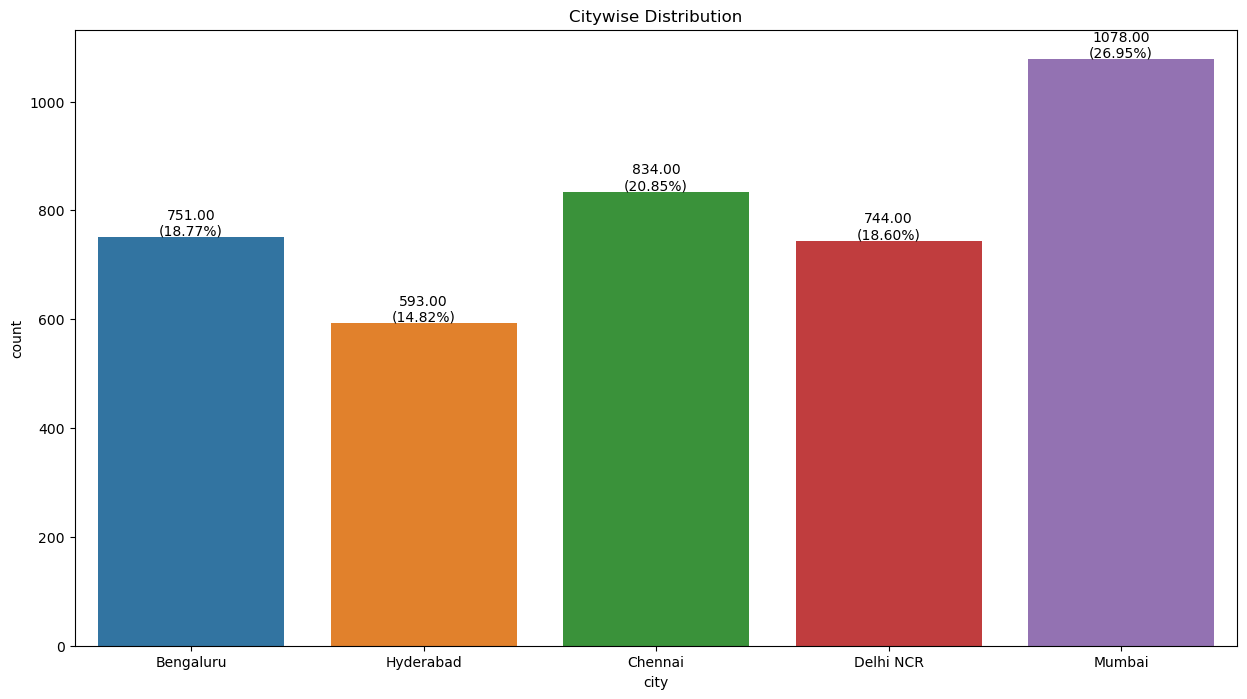

In [367]:
# value_counts of city
# Assuming df is your DataFrame and 'column_name' is the column you're counting
#plt.figure(figsize=(8, 7))
ax = sns.countplot(data=df_cust, x='city')

# Annotate each bar with its count
for p in ax.patches:
    percentage = (p.get_height() / total_cnt) * 100
    ax.annotate(f'{p.get_height():.2f}\n({percentage:.2f}%)', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Citywise Distribution')    
# Show the plot
plt.show()

Interpratation: Most iof the customer are from Mumbai then Chennai. Bengalore and Delhi NCR customer are mostly equal in number

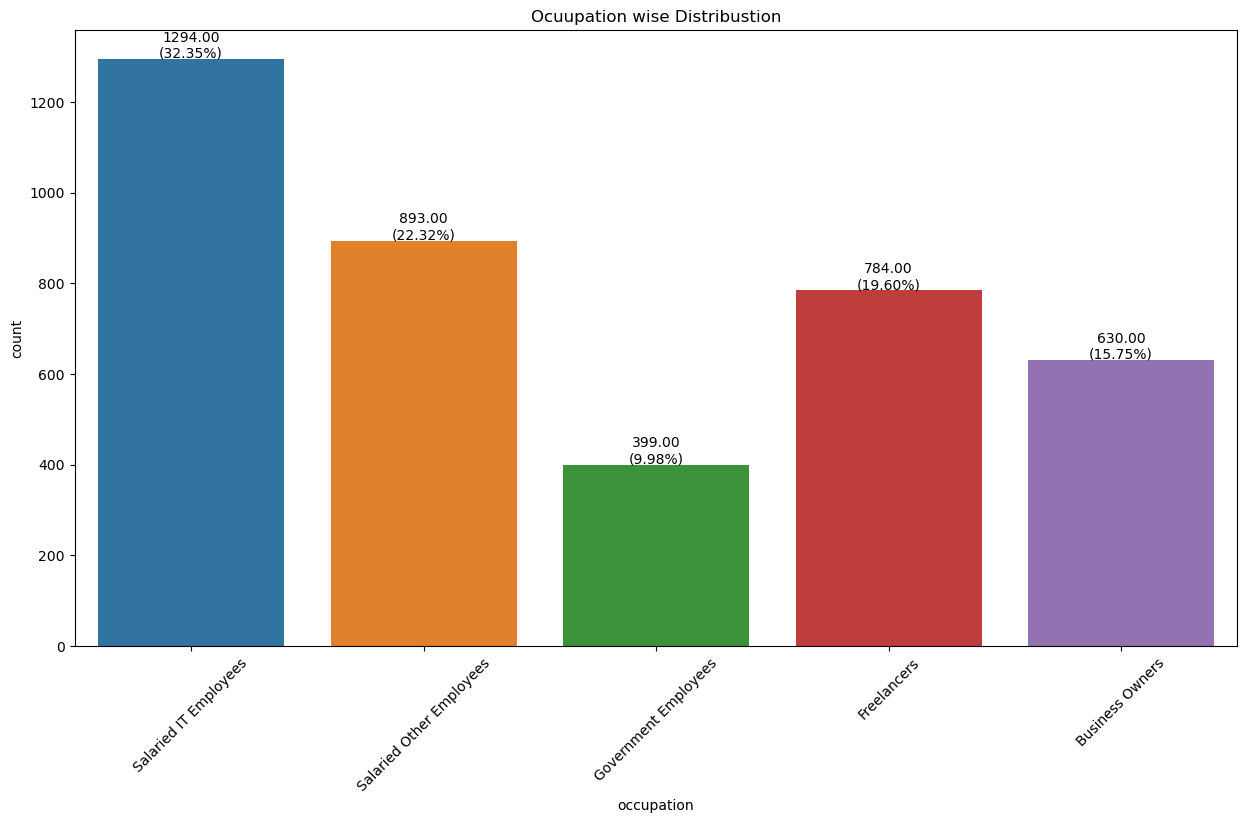

In [368]:
# value_counts of occupation
#plt.figure(figsize=(10, 7))
ax = sns.countplot(data=df_cust, x='occupation')

# Annotate each bar with its count
for p in ax.patches:
    percentage = (p.get_height() / total_cnt) * 100
    ax.annotate(f'{p.get_height():.2f}\n({percentage:.2f}%)', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Rotate x-axis labels by 45 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.title("Ocuupation wise Distribustion")
# Show the plot
plt.show()


# Interpretation:more than 50% of the customers afre Salaried customer. Salaried IT employees are hihgest in number

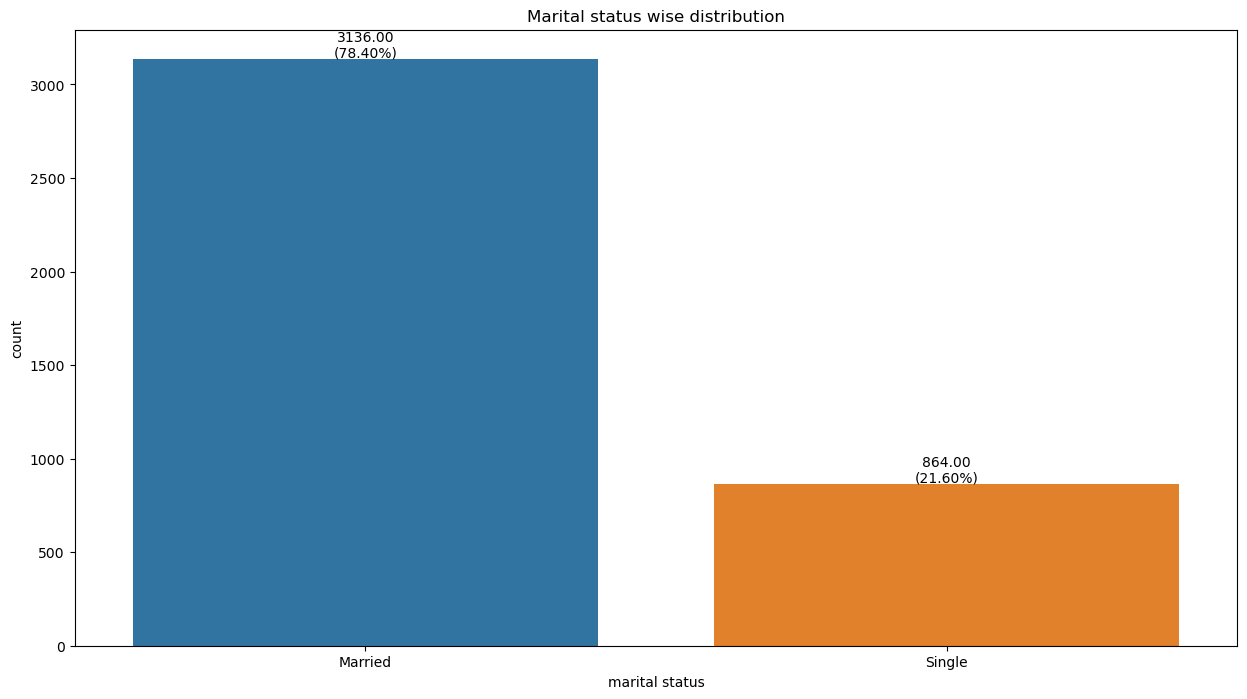

In [369]:
# value counts of people based on marital status

# Assuming df is your DataFrame and 'column_name' is the column you're counting
#plt.figure(figsize=(8, 7))
ax = sns.countplot(data=df_cust, x='marital status')

# Annotate each bar with its count
for p in ax.patches:
    percentage = (p.get_height() / total_cnt) * 100
    ax.annotate(f'{p.get_height():.2f}\n({percentage:.2f}%)', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Marital status wise distribution')
# Show the plot
plt.show()


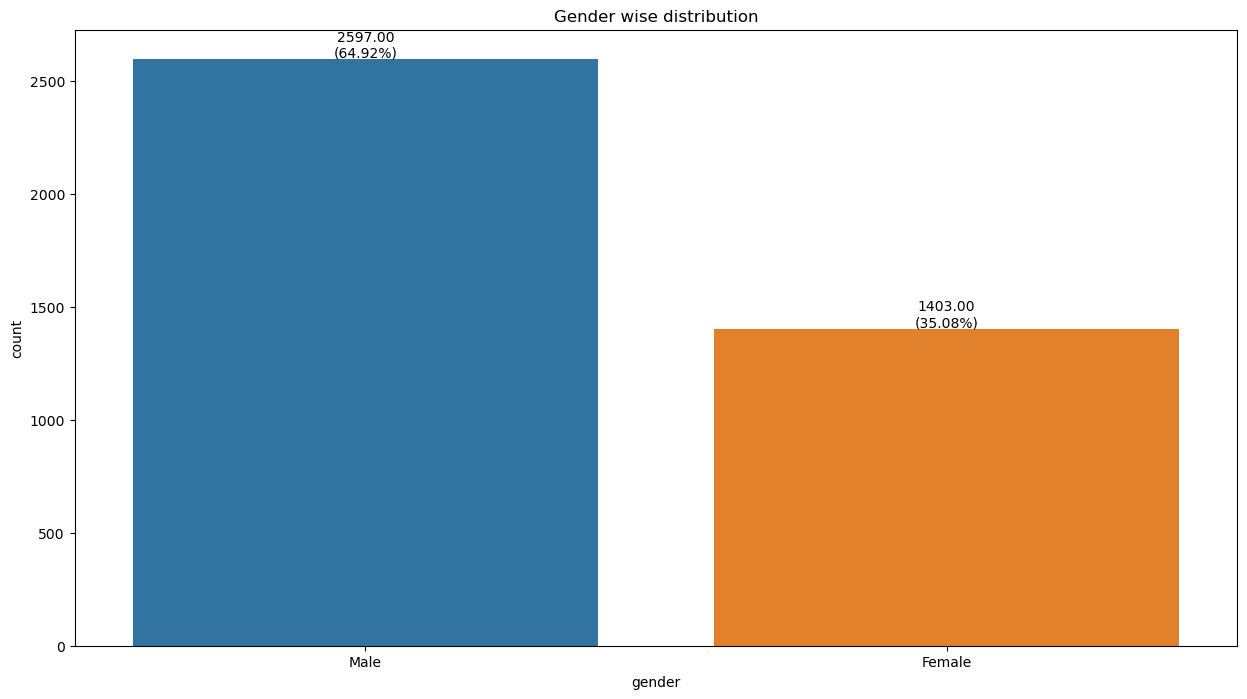

In [370]:
# value counts of gender
ax = sns.countplot(data=df_cust, x='gender')

# Annotate each bar with its count
for p in ax.patches:
    percentage = (p.get_height() / total_cnt) * 100
    ax.annotate(f'{p.get_height():.2f}\n({percentage:.2f}%)', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    
plt.title('Gender wise distribution')    
# Show the plot
plt.show()


# Interpretation: this dataset is Male dominant dataset

# Loading fact spends dataset

In [371]:
df_spnt = pd.read_csv("fact_spends.csv")
df_spnt

,customer_id,month,category,payment_type,spend
0,ATQCUS1371,July,Health & Wellness,Credit Card,1114
1,ATQCUS0368,October,Groceries,Credit Card,1466
2,ATQCUS0595,May,Health & Wellness,Credit Card,387
3,ATQCUS0667,October,Electronics,Credit Card,1137
4,ATQCUS3477,September,Bills,UPI,2102
...,...,...,...,...,...
863995,ATQCUS1993,June,Bills,Debit Card,897
863996,ATQCUS1063,September,Bills,Credit Card,2680
863997,ATQCUS0416,August,Others,Credit Card,270
863998,ATQCUS3361,September,Bills,UPI,446


In [372]:
df_spnt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864000 entries, 0 to 863999
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   customer_id   864000 non-null  object
 1   month         864000 non-null  object
 2   category      864000 non-null  object
 3   payment_type  864000 non-null  object
 4   spend         864000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 33.0+ MB


In [373]:
df_spnt.isnull().sum()

customer_id     0
month           0
category        0
payment_type    0
spend           0
dtype: int64

# No Missing Values in the dataset

In [374]:
df_spnt.describe(include='all')

,customer_id,month,category,payment_type,spend
count,864000,864000,864000,864000,864000.000000
unique,4000,6,9,4,NaN
top,ATQCUS1371,July,Health & Wellness,Credit Card,NaN
freq,216,144000,96000,216000,NaN
mean,NaN,NaN,NaN,NaN,614.464994
std,NaN,NaN,NaN,NaN,661.571676
min,NaN,NaN,NaN,NaN,6.000000
25%,NaN,NaN,NaN,NaN,191.000000
50%,NaN,NaN,NaN,NaN,395.000000
75%,NaN,NaN,NaN,NaN,793.000000


In [375]:
df_spnt.category.unique()

array(['Health & Wellness', 'Groceries', 'Electronics', 'Bills',
       'Entertainment', 'Apparel', 'Food', 'Others', 'Travel'],
      dtype=object)

In [376]:
df_spnt.payment_type.unique()

array(['Credit Card', 'UPI', 'Debit Card', 'Net Banking'], dtype=object)

# Exploring spending patterns
Bivariate analysis


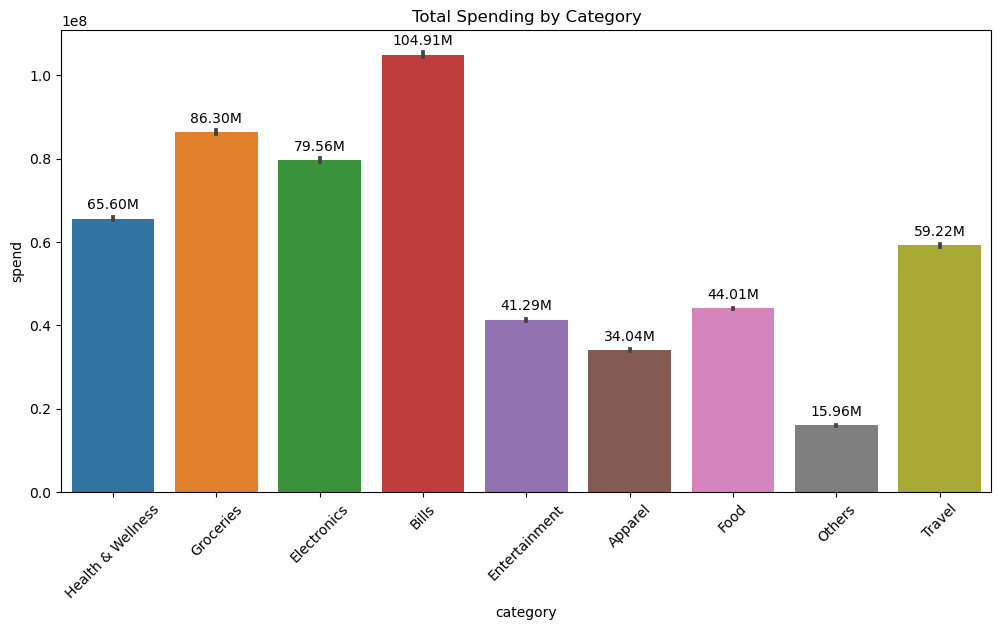

In [377]:
# Exploring spending pattern category wise
plt.figure(figsize=(12, 6))

# Use barplot to show the sum of spent by category
ax = sns.barplot(x='category', y='spend', data=df_spnt, estimator=sum)

# Annotate the bars with the sum of spent in millions
for p in ax.patches:
    value_in_millions = p.get_height() / 1e6  # Convert the value to millions
    ax.annotate(f'{value_in_millions:.2f}M', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xticks(rotation=45)
plt.title("Total Spending by Category")
#plt.legend(title='Category', loc='upper right')  # Add legend for clarity
plt.show()

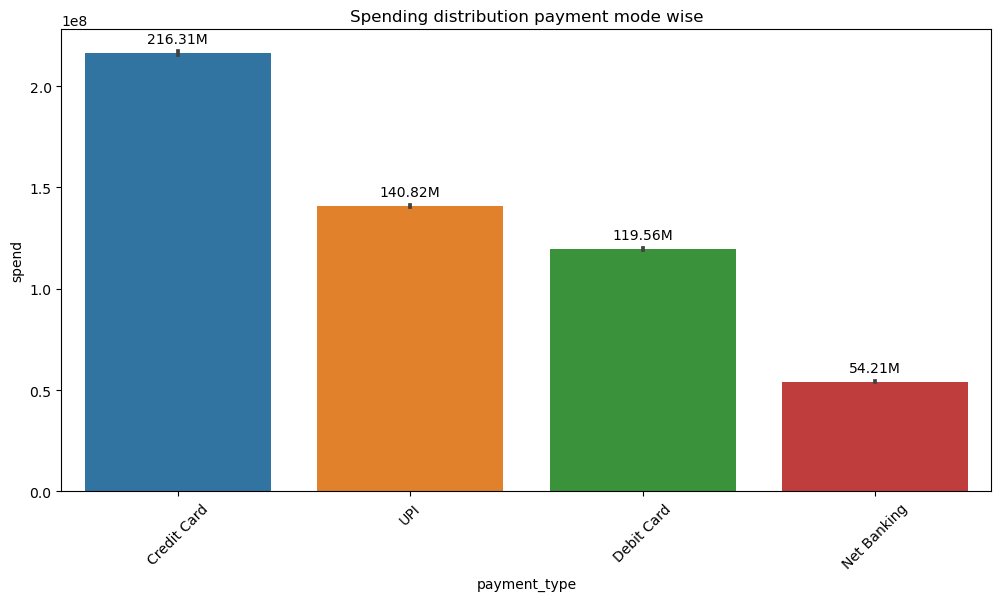

In [378]:
# Explore spending patterns
plt.figure(figsize=(12, 6))

# Use barplot to show the sum of spent by payment type
ax = sns.barplot(x='payment_type', y='spend', data=df_spnt, estimator=sum)

# Annotate the bars with the sum of spent in millions
for p in ax.patches:
    value_in_millions = p.get_height() / 1e6  # Convert the value to millions
    ax.annotate(f'{value_in_millions:.2f}M', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title("Spending distribution payment mode wise")
plt.xticks(rotation=45)
plt.show()

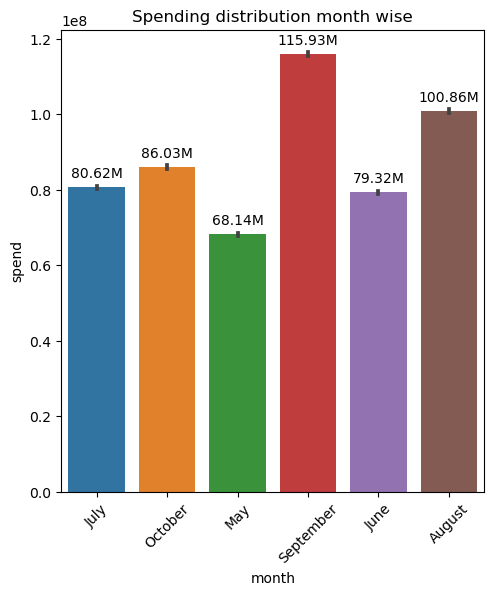

In [379]:
# Explore spending patterns
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
# Use barplot to show the sum of spent by month
ax = sns.barplot(x='month', y='spend', data=df_spnt, estimator=sum)

# Annotate the bars with the sum of spent in millions
for p in ax.patches:
    value_in_millions = p.get_height() / 1e6  # Convert the value to millions
    ax.annotate(f'{value_in_millions:.2f}M', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title("Spending distribution month wise")
plt.xticks(rotation=45)
plt.show()

# Calculating average monthly spent of the each customer

In [382]:
total_customer_spend_mon = df_spnt.groupby(['customer_id','month'])['spend'].sum().reset_index()
print(total_customer_spend_mon)

      customer_id      month  spend
0      ATQCUS0001     August  33776
1      ATQCUS0001       July  29451
2      ATQCUS0001       June  26316
3      ATQCUS0001        May  19480
4      ATQCUS0001    October  25262
...           ...        ...    ...
23995  ATQCUS4000       July   8456
23996  ATQCUS4000       June   8874
23997  ATQCUS4000        May   7497
23998  ATQCUS4000    October   9171
23999  ATQCUS4000  September   8972

[24000 rows x 3 columns]


In [383]:
customer_data = total_customer_spend_mon[total_customer_spend_mon['customer_id'] == 'ATQCUS3997']
print(customer_data)


      customer_id      month  spend
23976  ATQCUS3997     August  11880
23977  ATQCUS3997       July   7504
23978  ATQCUS3997       June   9685
23979  ATQCUS3997        May  10168
23980  ATQCUS3997    October   8345
23981  ATQCUS3997  September   8682


In [384]:
average_monthly_spend = total_customer_spend_mon.groupby('customer_id')['spend'].mean().reset_index()
print(average_monthly_spend)

     customer_id        spend
0     ATQCUS0001 28424.166667
1     ATQCUS0002 28085.666667
2     ATQCUS0003 26255.666667
3     ATQCUS0004 27109.166667
4     ATQCUS0005 26216.000000
...          ...          ...
3995  ATQCUS3996 16598.166667
3996  ATQCUS3997  9377.333333
3997  ATQCUS3998  9960.000000
3998  ATQCUS3999 11190.333333
3999  ATQCUS4000  8924.833333

[4000 rows x 2 columns]


In [386]:
average_monthly_spend = average_monthly_spend.rename(columns={'spend': 'avg_mon_spends'})
print(average_monthly_spend)

     customer_id  avg_mon_spends
0     ATQCUS0001    28424.166667
1     ATQCUS0002    28085.666667
2     ATQCUS0003    26255.666667
3     ATQCUS0004    27109.166667
4     ATQCUS0005    26216.000000
...          ...             ...
3995  ATQCUS3996    16598.166667
3996  ATQCUS3997     9377.333333
3997  ATQCUS3998     9960.000000
3998  ATQCUS3999    11190.333333
3999  ATQCUS4000     8924.833333

[4000 rows x 2 columns]


# Merging the average monthly spend feature of each customer to the customers dataset 

In [387]:
df_cust = pd.merge(df_cust,average_monthly_spend,on='customer_id',how='left')
df_cust

,customer_id,age_group,city,occupation,gender,marital status,avg_income,avg_mon_spends
0,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,32400.666667
1,ATQCUS0809,25-34,Hyderabad,Salaried Other Employees,Male,Married,39922,16518.666667
2,ATQCUS0663,25-34,Chennai,Salaried Other Employees,Male,Married,37702,11517.000000
3,ATQCUS0452,25-34,Delhi NCR,Government Employees,Male,Married,54090,20384.833333
4,ATQCUS3350,21-24,Bengaluru,Freelancers,Male,Single,28376,12251.000000
...,...,...,...,...,...,...,...,...
3995,ATQCUS3035,45+,Delhi NCR,Business Owners,Female,Married,72805,19648.833333
3996,ATQCUS2585,35-45,Mumbai,Salaried Other Employees,Female,Married,41343,20962.000000
3997,ATQCUS1229,35-45,Bengaluru,Salaried IT Employees,Male,Married,65948,41215.000000
3998,ATQCUS0581,25-34,Bengaluru,Government Employees,Male,Married,52589,17892.333333


# Calculating key metric Average income utilization % of customers
#Avg_Income_Utlization% = (avg_mon_spends/avg_income)*100

In [388]:


df_cust['avg_Income_utilization%'] = df_cust['avg_mon_spends'] / df_cust['avg_income']*100
df_cust

,customer_id,age_group,city,occupation,gender,marital status,avg_income,avg_mon_spends,avg_Income_utilization%
0,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,32400.666667,44.068749
1,ATQCUS0809,25-34,Hyderabad,Salaried Other Employees,Male,Married,39922,16518.666667,41.377353
2,ATQCUS0663,25-34,Chennai,Salaried Other Employees,Male,Married,37702,11517.000000,30.547451
3,ATQCUS0452,25-34,Delhi NCR,Government Employees,Male,Married,54090,20384.833333,37.686880
4,ATQCUS3350,21-24,Bengaluru,Freelancers,Male,Single,28376,12251.000000,43.173809
...,...,...,...,...,...,...,...,...,...
3995,ATQCUS3035,45+,Delhi NCR,Business Owners,Female,Married,72805,19648.833333,26.988302
3996,ATQCUS2585,35-45,Mumbai,Salaried Other Employees,Female,Married,41343,20962.000000,50.702658
3997,ATQCUS1229,35-45,Bengaluru,Salaried IT Employees,Male,Married,65948,41215.000000,62.496209
3998,ATQCUS0581,25-34,Bengaluru,Government Employees,Male,Married,52589,17892.333333,34.022958


In [389]:
df_cust['avg_Income_utilization%'].isnull().sum()

0

In [390]:
total_incomeUtilization = df_cust['avg_Income_utilization%'].mean()
print(total_incomeUtilization)

42.948018088570855


In [391]:
# creating copy of the df_cus
df_cluster = df_cust.copy()

# Distribution of Avg_Income_utlization% with various other features

In [392]:
# which age_group has more income utilization Bi variate analysis
agewise_incomeUti = df_cust.groupby('age_group')['avg_Income_utilization%'].mean()
agewise_incomeUti

age_group
21-24   40.506054
25-34   43.787543
35-45   46.610622
45+     35.080534
Name: avg_Income_utilization%, dtype: float64

In [309]:
total_incomeUtilization = (df_cust['avg_Income_utilization%']).mean()
total_incomeUtilization

42.948018088570855

Text(0.5, 1.0, 'Average Income Utilization by Age Group')

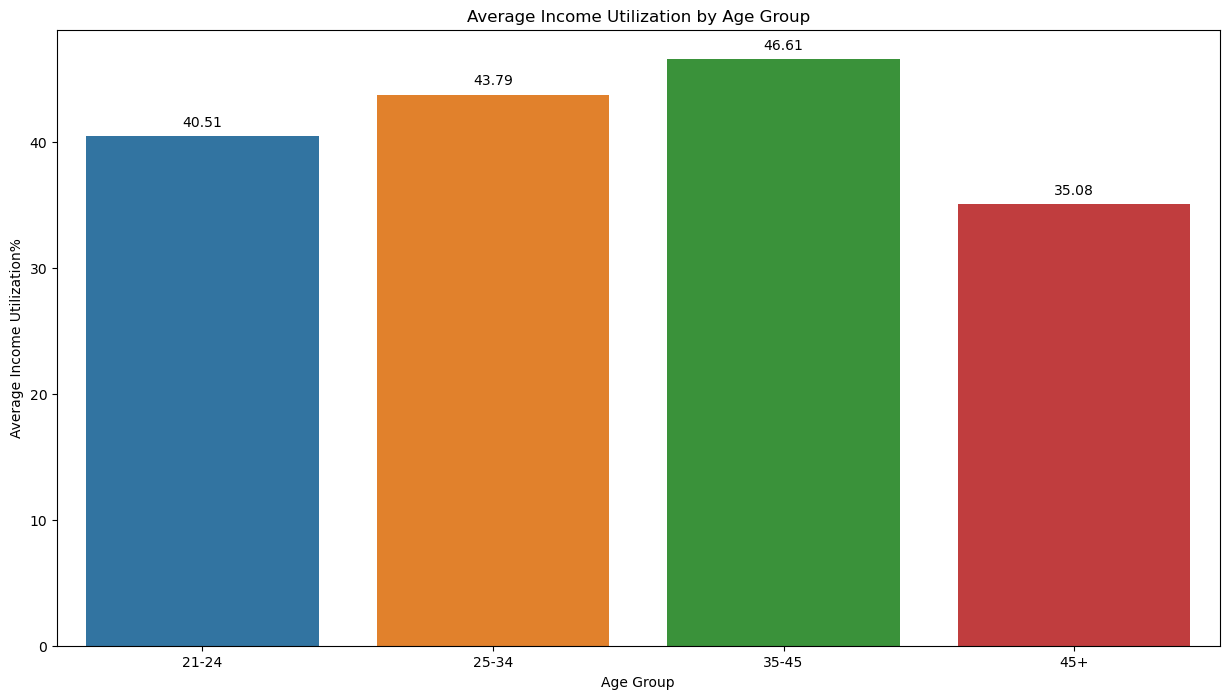

In [310]:
ax = sns.barplot(data=agewise_incomeUti.reset_index(), x='age_group', y='avg_Income_utilization%')
for p in ax.patches:
     #percentage = (p.get_height() / total_incomeUtilization) * 100
    ax.annotate(f'{p.get_height():.2f}',(p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Set labels and title
plt.xlabel('Age Group')
plt.ylabel('Average Income Utilization%')
plt.title('Average Income Utilization by Age Group')


occupation
Business Owners            33.240072
Freelancers                45.747201
Government Employees       28.962687
Salaried IT Employees      50.926477
Salaried Other Employees   42.026931
Name: avg_Income_utilization%, dtype: float64


Text(0.5, 1.0, 'Average Income Utilization% by Occupation')

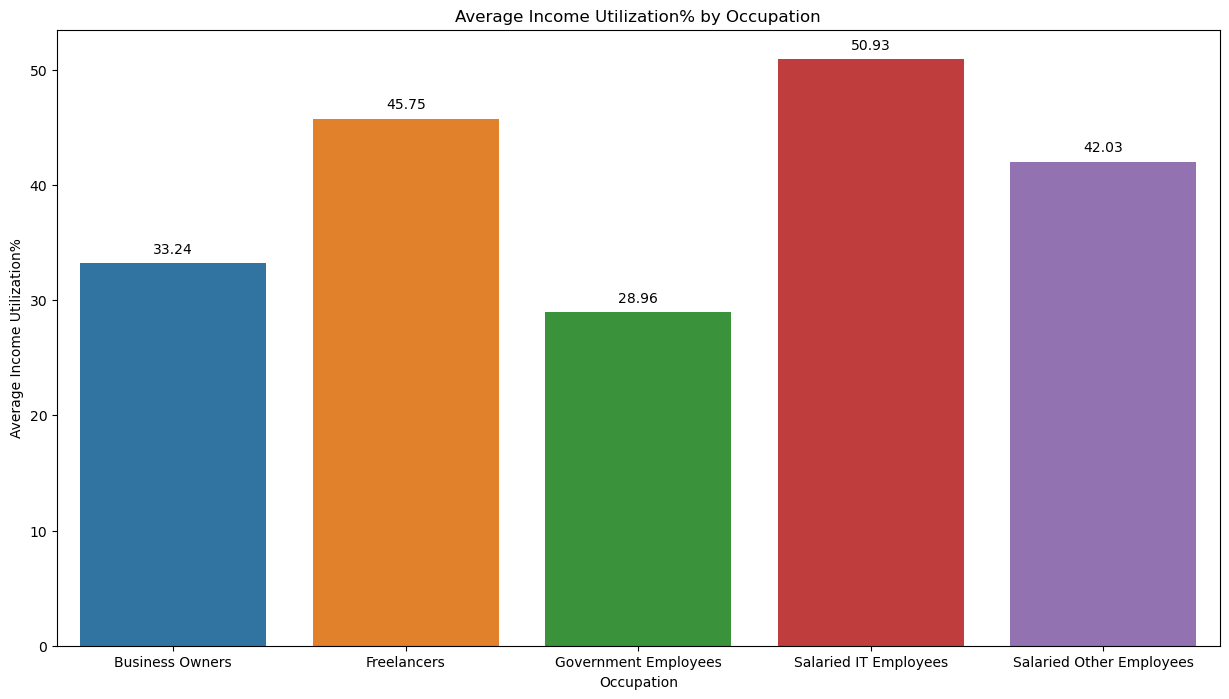

In [311]:
#occupation wise income utilization
occupation_incomeUti = df_cust.groupby('occupation')['avg_Income_utilization%'].mean()
print(occupation_incomeUti)
ax = sns.barplot(data=occupation_incomeUti.reset_index(), x='occupation', y='avg_Income_utilization%')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Set labels and title
plt.xlabel('Occupation')
plt.ylabel('Average Income Utilization%')
plt.title('Average Income Utilization% by Occupation')


city
Bengaluru   43.739528
Chennai     31.104608
Delhi NCR   48.090142
Hyderabad   36.467385
Mumbai      51.575343
Name: avg_Income_utilization%, dtype: float64


Text(0.5, 1.0, 'Average Income Utilization% by City')

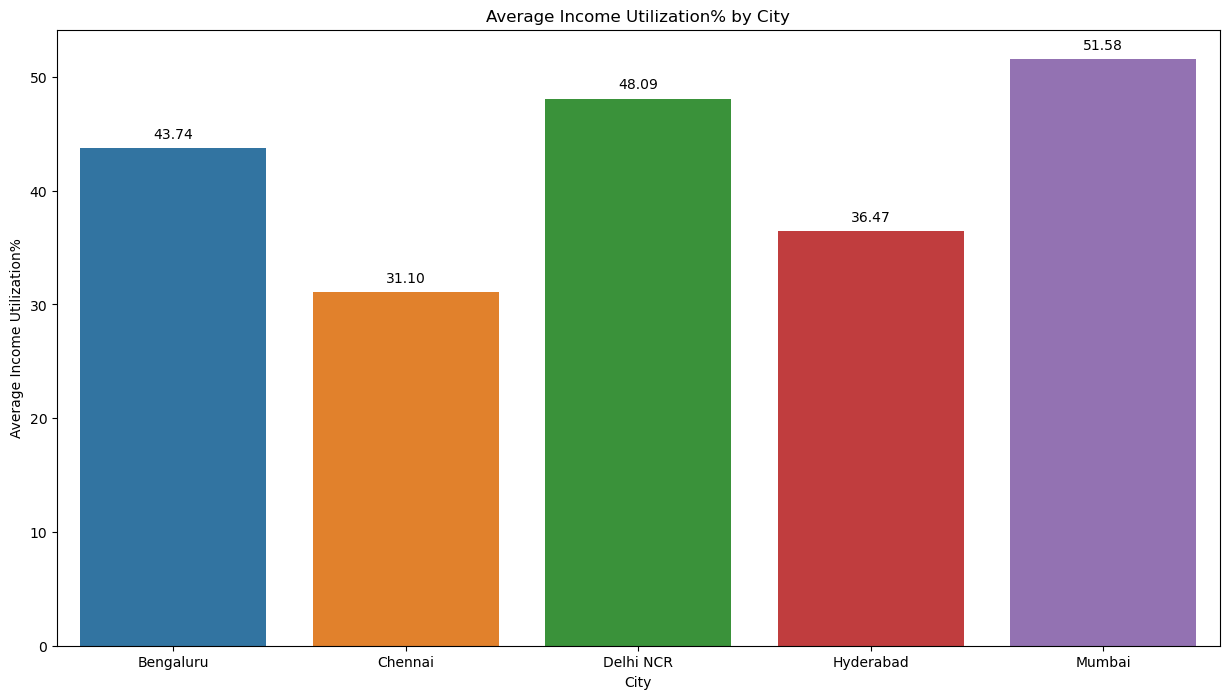

In [312]:
#City wise income utilization
city_incomeUti = df_cust.groupby('city')['avg_Income_utilization%'].mean()
print(city_incomeUti)
ax = sns.barplot(data=city_incomeUti.reset_index(), x='city', y='avg_Income_utilization%')
for p in ax.patches:
    #percentage = (p.get_height() / total_incomeUtilization) * 100
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
# Set labels and title
plt.xlabel('City')
plt.ylabel('Average Income Utilization%')
plt.title('Average Income Utilization% by City')

marital status
Married   42.987762
Single    42.803761
Name: avg_Income_utilization%, dtype: float64


Text(0.5, 1.0, 'Aveage Income Utilization% by Marital Status')

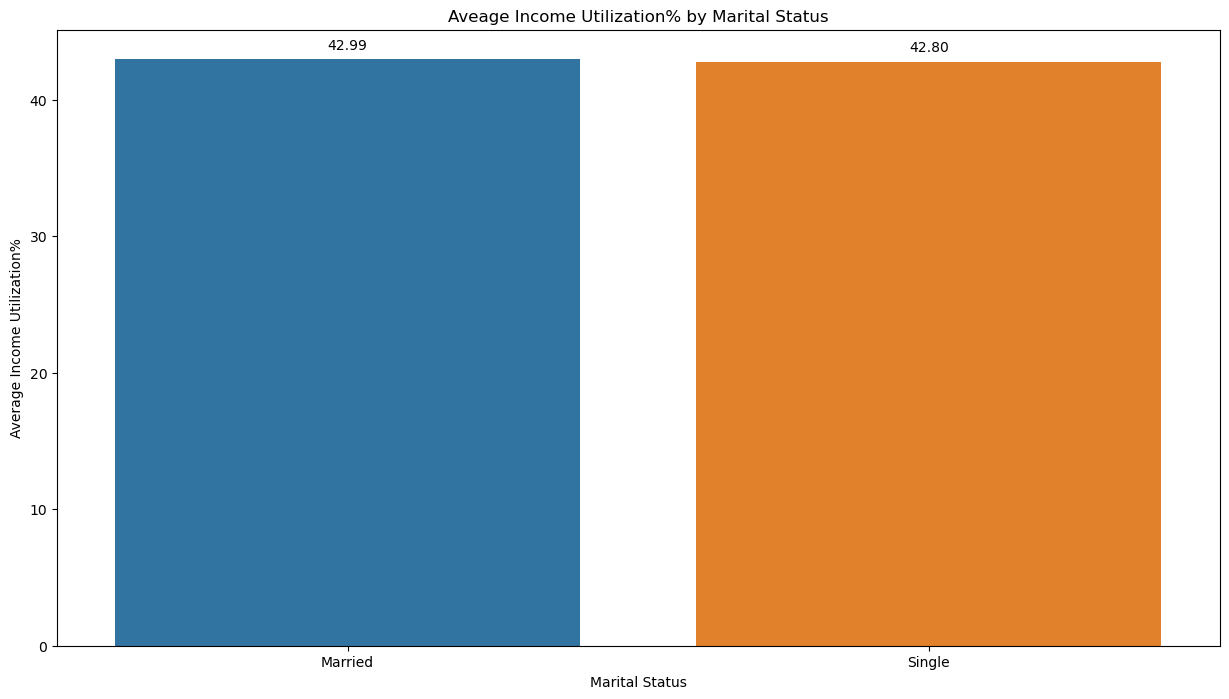

In [313]:
#marital status wise income utilization
maritalstatus_incomeUti = df_cust.groupby('marital status')['avg_Income_utilization%'].mean()
print(maritalstatus_incomeUti)
ax = sns.barplot(data=maritalstatus_incomeUti.reset_index(), x='marital status', y='avg_Income_utilization%')
for p in ax.patches:
    #percentage = (p.get_height() / total_incomeUtilization) * 100
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Set labels and title
plt.xlabel('Marital Status')
plt.ylabel('Average Income Utilization%')
plt.title('Aveage Income Utilization% by Marital Status')

gender
Female   39.648599
Male     44.730492
Name: avg_Income_utilization%, dtype: float64


Text(0.5, 1.0, 'Averag Income Utilization% by Gender')

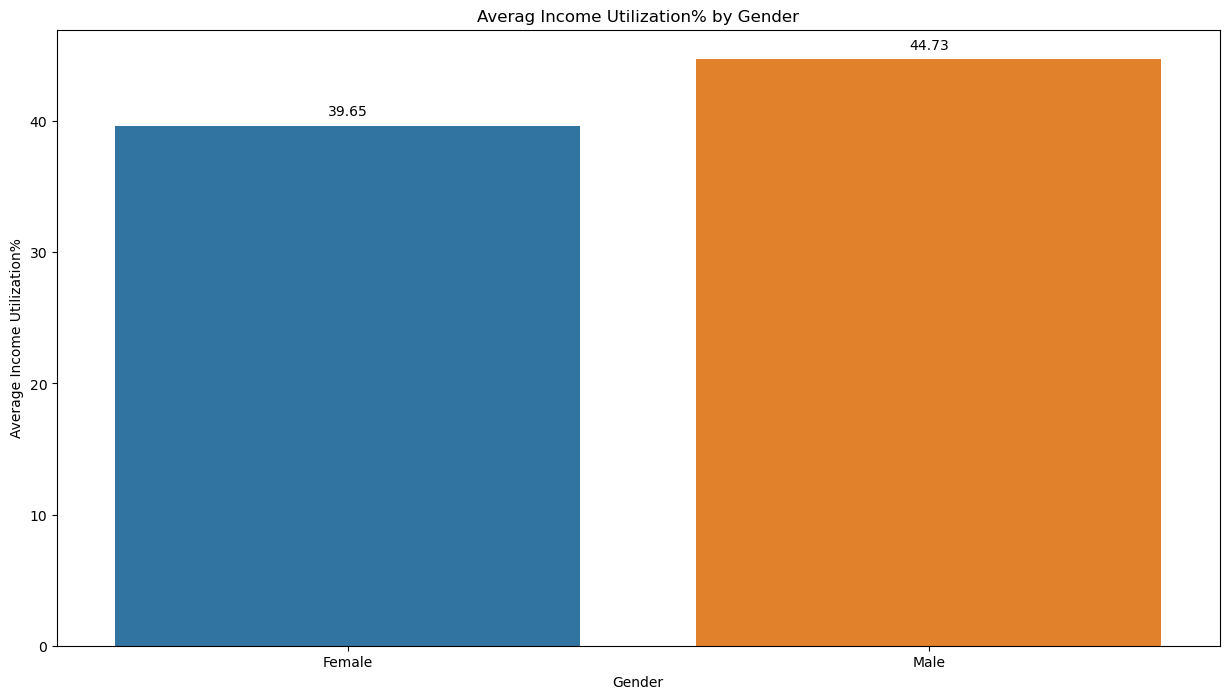

In [314]:
#gender wise income utilization
gender_incomeUti = df_cust.groupby('gender')['avg_Income_utilization%'].mean()
print(gender_incomeUti)
ax = sns.barplot(data=gender_incomeUti.reset_index(), x='gender', y='avg_Income_utilization%')
for p in ax.patches:
    percentage = (p.get_height() / total_incomeUtilization) * 100
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points') 
# Set labels and title
plt.xlabel('Gender')
plt.ylabel('Average Income Utilization%')
plt.title('Averag Income Utilization% by Gender')

# inferences made by the Bivariate analysis of all features with the income Utilization 
1. On an average range the Salaried IT employed  male customer from age group 35-45, city Mumbai  has the highest Income Utlization percentage. SO they should be our target customers .
2. On the second rank we should target Male ,Salaried employed customers from age group 25-35 ,city Delhi NCR.
3. People of Mumbai spent more but that can be  becuase the it is the most expensive city in India .then the Bengaluru comes .
4. The income utlization% is coming approximately same for both Married and single customers. In case of gender the data available for Male is more then female and so their average income utilization% . But in general if we see the expenditure of Male person and married person are more ,as in most houses in India the male person is the whole sole responsible for earning .

# KMEANS CLUSTERING for customer segmentation and identification of our target customers.
For Clustering we dont require customer ID ,so dropping it

In [393]:
df_cust = df_cust.drop('customer_id',axis=1)
df_cust

,age_group,city,occupation,gender,marital status,avg_income,avg_mon_spends,avg_Income_utilization%
0,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,32400.666667,44.068749
1,25-34,Hyderabad,Salaried Other Employees,Male,Married,39922,16518.666667,41.377353
2,25-34,Chennai,Salaried Other Employees,Male,Married,37702,11517.000000,30.547451
3,25-34,Delhi NCR,Government Employees,Male,Married,54090,20384.833333,37.686880
4,21-24,Bengaluru,Freelancers,Male,Single,28376,12251.000000,43.173809
...,...,...,...,...,...,...,...,...
3995,45+,Delhi NCR,Business Owners,Female,Married,72805,19648.833333,26.988302
3996,35-45,Mumbai,Salaried Other Employees,Female,Married,41343,20962.000000,50.702658
3997,35-45,Bengaluru,Salaried IT Employees,Male,Married,65948,41215.000000,62.496209
3998,25-34,Bengaluru,Government Employees,Male,Married,52589,17892.333333,34.022958


In [394]:
# Numeric features
df_num = df_cust.select_dtypes(include=['number'])
df_num

,avg_income,avg_mon_spends,avg_Income_utilization%
0,73523,32400.666667,44.068749
1,39922,16518.666667,41.377353
2,37702,11517.000000,30.547451
3,54090,20384.833333,37.686880
4,28376,12251.000000,43.173809
...,...,...,...
3995,72805,19648.833333,26.988302
3996,41343,20962.000000,50.702658
3997,65948,41215.000000,62.496209
3998,52589,17892.333333,34.022958


In [395]:
# for clustering ,checking for outliers using Boxplot

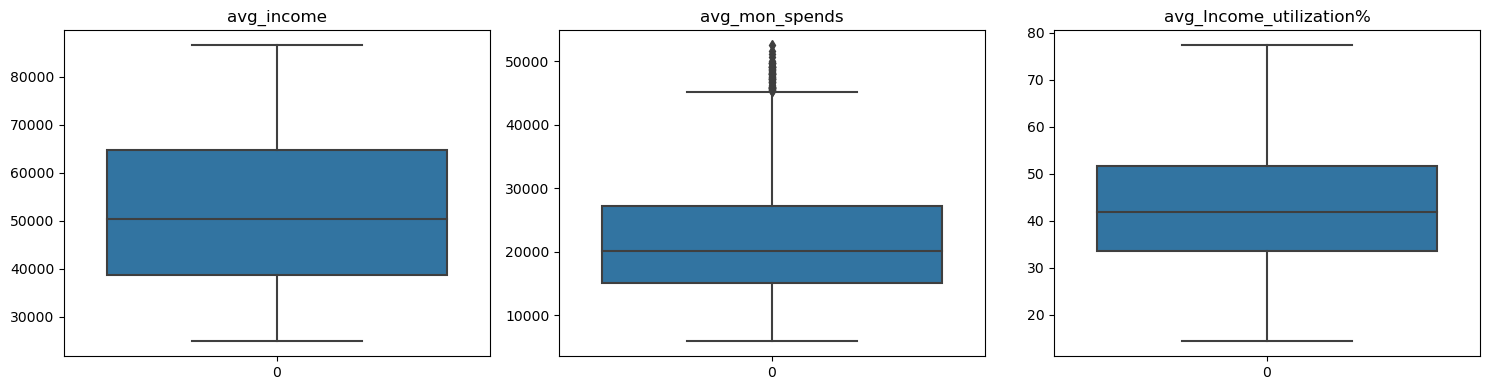

In [318]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

# Use for loop to plot the boxplot for each variable
for variable, subplot in zip(df_num.columns, ax.flatten()):
    
    # Use boxplot() to plot the graph
    # Pass the axes for the plot to the parameter, 'ax'
    sns.boxplot(df_num[variable], ax=subplot)
    
    # Add the name of the feature above the box plot
    subplot.set_title(variable)
    subplot.set_xlabel('')  # Optionally remove x-axis label for better layout

# Display the plot
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

#  Interpretation from above Box Plot:
The data points coming as outliers in the avg_mon_spends, for our scenario we cannot consider it as outlier because those data points are high spending data points and for us those are the target customers who spend more .

In [396]:
df_cust.isnull().sum()

age_group                  0
city                       0
occupation                 0
gender                     0
marital status             0
avg_income                 0
avg_mon_spends             0
avg_Income_utilization%    0
dtype: int64

# Segmentation based on average income and average income Utlization%

In [397]:
df_numerical = df_cust[['avg_income','avg_Income_utilization%']]

In [398]:
scaler = StandardScaler()
df_numerical_scaled = pd.DataFrame(scaler.fit_transform(df_numerical),columns=df_numerical.columns)

In [399]:
df_numerical_scaled

,avg_income,avg_Income_utilization%
0,1.488665,0.091029
1,-0.798937,-0.127573
2,-0.950078,-1.007206
3,0.165640,-0.427323
4,-1.585005,0.018339
...,...,...
3995,1.439783,-1.296289
3996,-0.702194,0.629852
3997,0.972949,1.587754
3998,0.063450,-0.724916


In [323]:
!pip install --upgrade threadpoolctl

In [324]:
pip install -U scikit-learn

In [400]:
# create several cluster combinations ranging from 1 to 20 and observe the wcss (Within Cluster Sum of Squares) for each cluster
# consider an empty list to store the WCSS
wcss  = []

# use for loop to perform K-means with different values of K
# set the 'random_state' to obtain the same centroid initialization for each code run
# fit the model on scaled data
# append the value of WCSS for each K to the list 'wcss'
# the 'inertia_' retuns the WCSS for specific value of K
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 10)
    kmeans.fit(df_numerical_scaled)
    wcss.append(kmeans.inertia_)

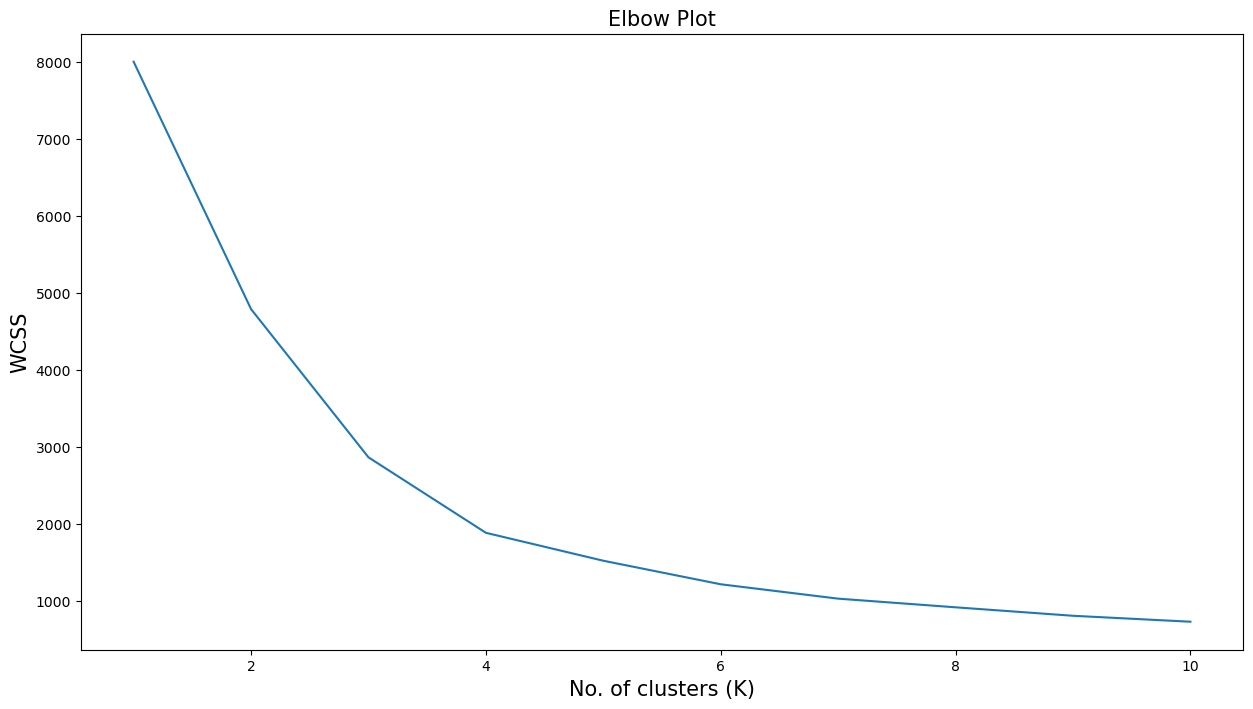

In [401]:
# visualize the elbow plot to get the optimal value of K
plt.plot(range(1,11), wcss)

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Elbow Plot', fontsize = 15)
plt.xlabel('No. of clusters (K)', fontsize = 15)
plt.ylabel('WCSS', fontsize = 15)

# display the plot
plt.show()

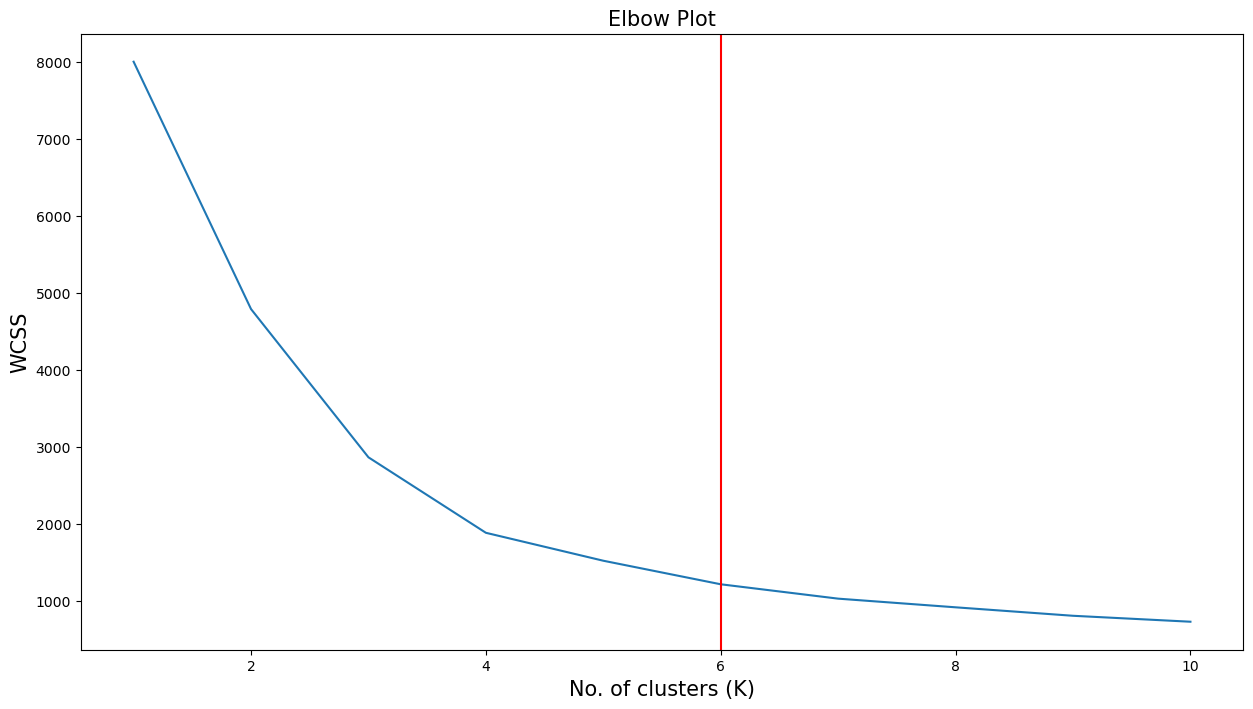

In [402]:
# visualize the elbow plot to get the optimal value of K
plt.plot(range(1,11), wcss)

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Elbow Plot', fontsize = 15)
plt.xlabel('No. of clusters (K)', fontsize = 15)
plt.ylabel('WCSS', fontsize = 15)

# plot a vertical line at the elbow
plt.axvline(x = 6, color = 'red')

# display the plot
plt.show()

In [403]:
# create a list for different values of K
n_clusters = [2, 3, 4, 5, 6, 7]

# use 'for' loop to build the clusters
# 'random_state' returns the same sample each time you run the code  
# fit and predict on the scaled data
# 'silhouette_score' function computes the silhouette score for each K
for K in n_clusters:
    cluster = KMeans (n_clusters= K, random_state= 10)
    predict = cluster.fit_predict(df_numerical_scaled)
    score = silhouette_score(df_numerical_scaled, predict, random_state= 10)
    print ("For {} clusters the silhouette score is {})".format(K, score))

For 2 clusters the silhouette score is 0.4087724088601005)
For 3 clusters the silhouette score is 0.43411433924578546)
For 4 clusters the silhouette score is 0.44014461789498954)
For 5 clusters the silhouette score is 0.4143285060683256)
For 6 clusters the silhouette score is 0.41638493677188126)
For 7 clusters the silhouette score is 0.3985853212626603)


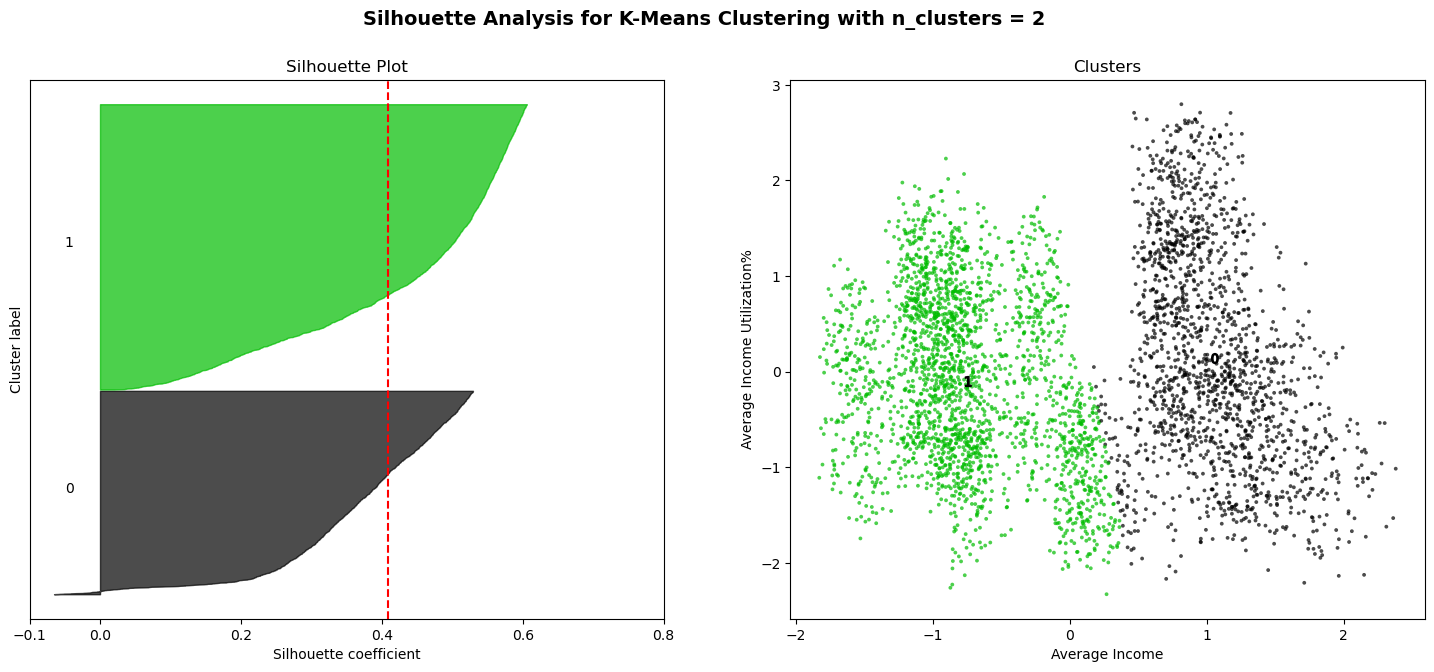

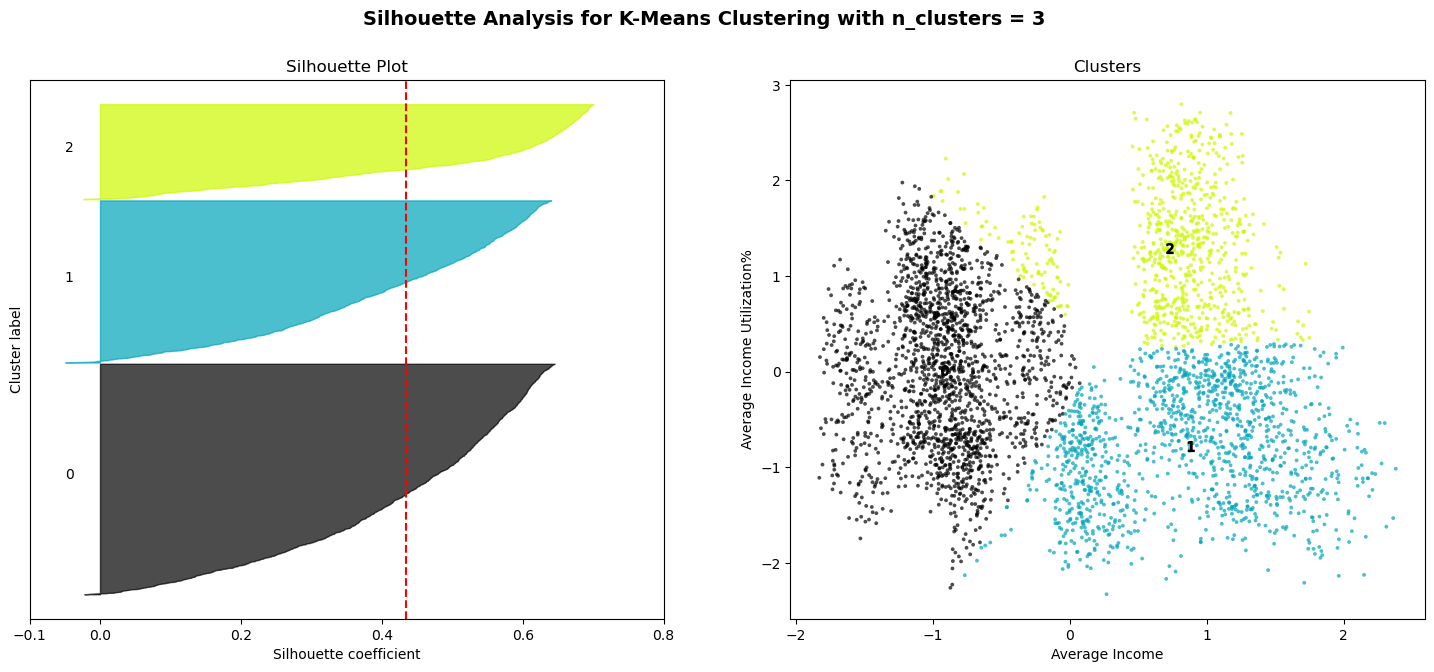

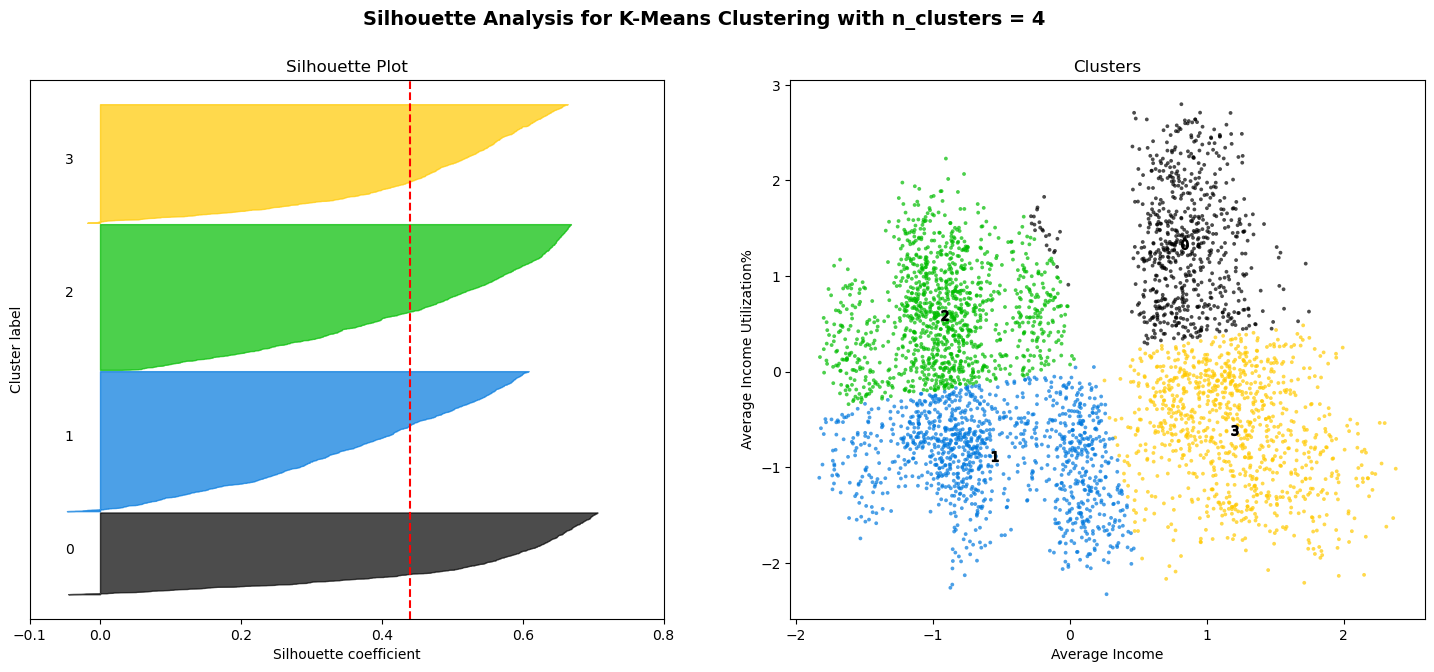

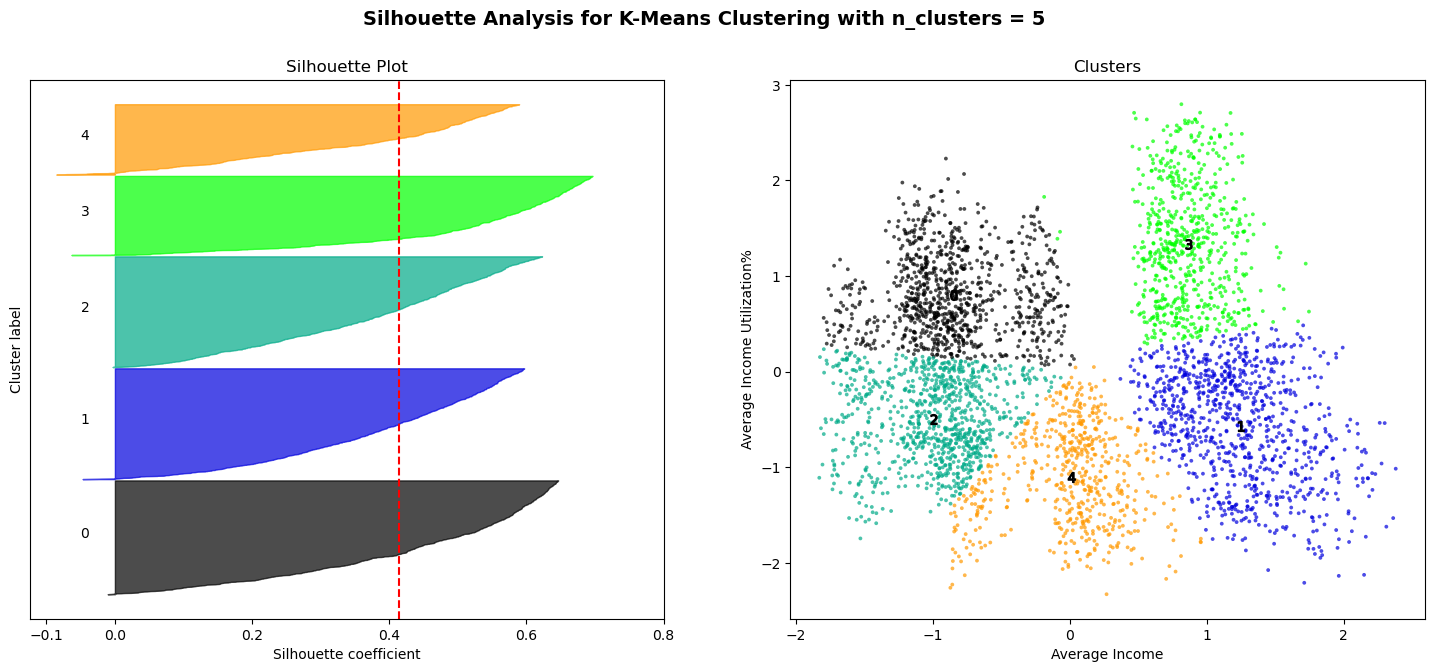

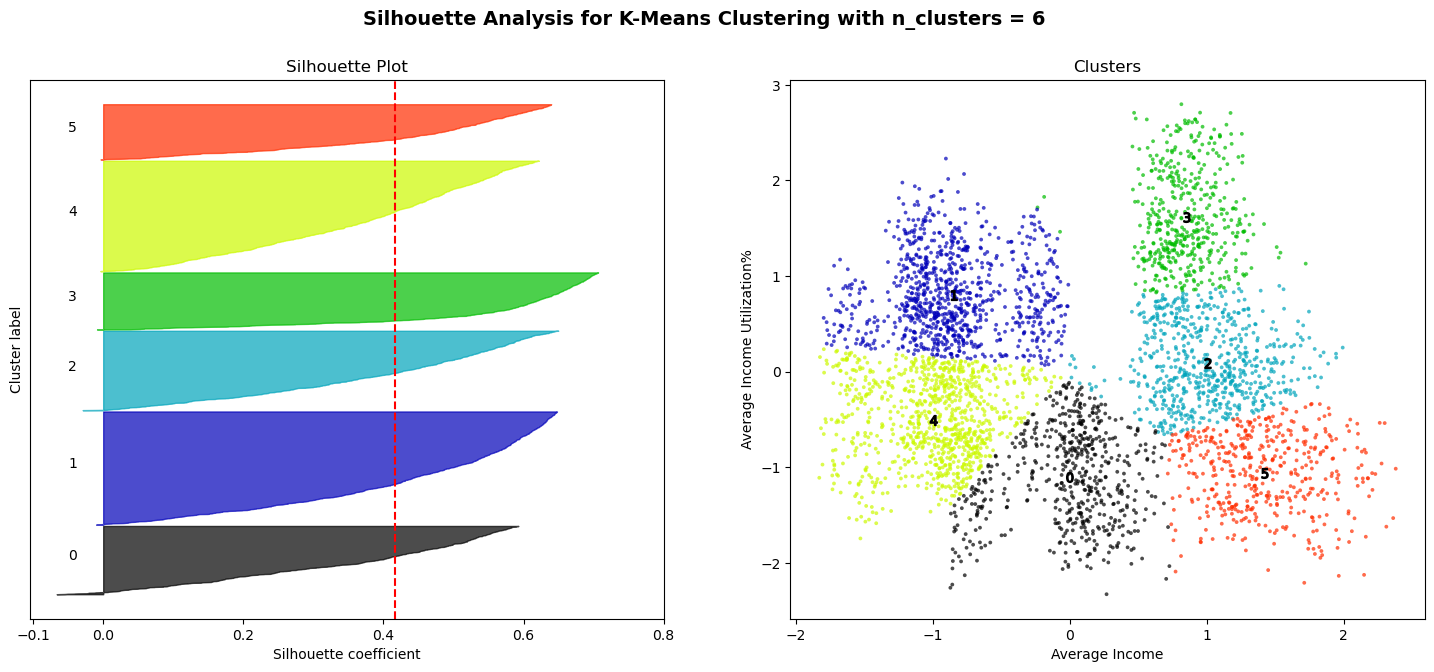

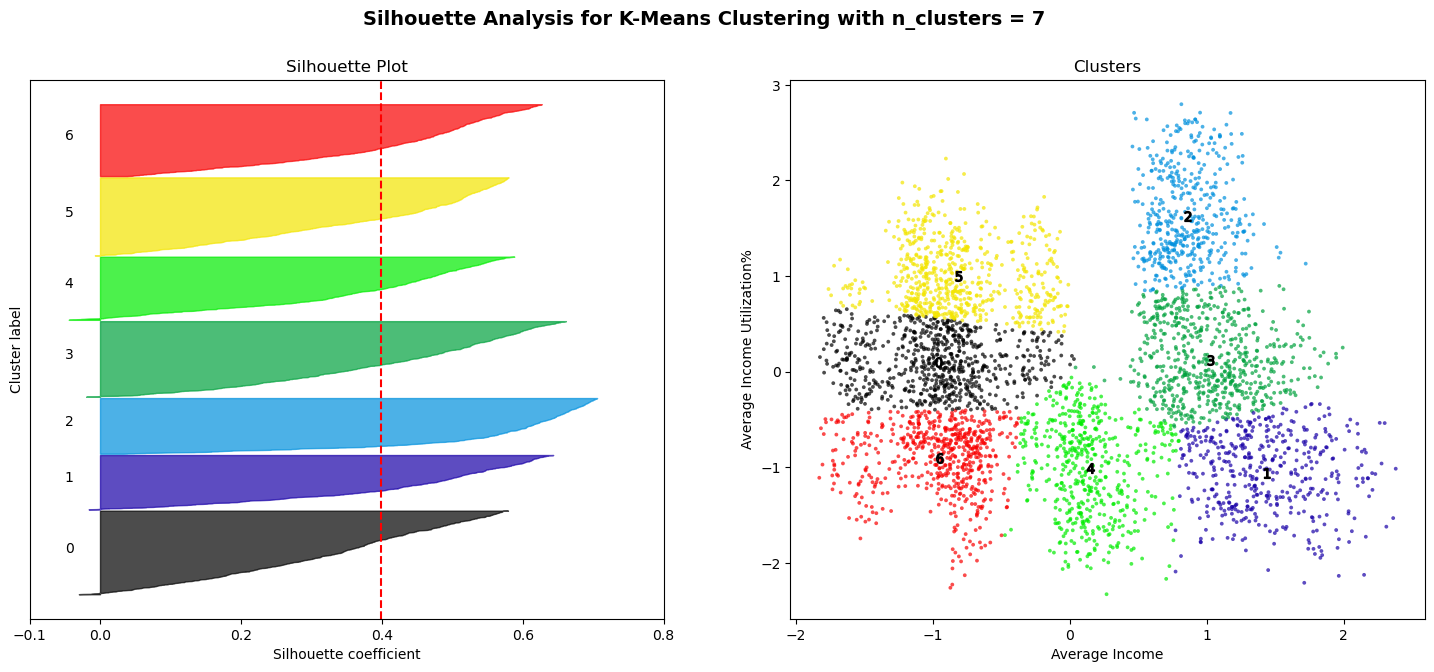

In [334]:
# consider the number of clusters
n_clusters = [2, 3, 4, 5, 6, 7]

# consider an array of the data
df_numerical_scaled= np.array(df_numerical_scaled)

# for each value of K, plot the silhouette plot the clusters formed
for K in n_clusters:
    
    # create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    
    # set the figure size
    fig.set_size_inches(18, 7)

    # the 1st subplot is the silhouette plot
    # initialize the cluster with 'K' value and a random generator
    model = KMeans(n_clusters = K, random_state = 10)
    
    # fit and predict on the scaled data
    cluster_labels = model.fit_predict(df_numerical_scaled)

    # the 'silhouette_score()' gives the average value for all the samples
    silhouette_avg = silhouette_score(df_numerical_scaled, cluster_labels)
    
    # Compute the silhouette coefficient for each sample
    sample_silhouette_values = silhouette_samples(df_numerical_scaled, cluster_labels)

    y_lower = 10
    for i in range(K):
        
        # aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        
        # sort the silhouette coefficient
        ith_cluster_silhouette_values.sort()
        
        # calculate the size of the cluster
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # color each cluster 
        color = cm.nipy_spectral(float(i) / K)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # compute the new y_lower for next plot
        y_lower = y_upper + 10 

    # set the axes and plot label
    ax1.set_title("Silhouette Plot")
    ax1.set_xlabel("Silhouette coefficient")
    ax1.set_ylabel("Cluster label")

    # plot the vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    # clear the y-axis ticks
    ax1.set_yticks([])  
    
    # set the ticks for x-axis 
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8])

    
    # 2nd plot showing the actual clusters formed
    # consider different color for each cluster
    colors = cm.nipy_spectral(cluster_labels.astype(float) / K)
    
    # plot a scatter plot to visualize the clusters
    ax2.scatter(df_numerical_scaled[:, 0], df_numerical_scaled[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

    # label the cluster centers
    centers = model.cluster_centers_
    
    # display the cluster center with cluster number
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')
    
    # add the axes and plot title
    ax2.set_title("Clusters")
    ax2.set_xlabel("Average Income")
    ax2.set_ylabel("Average Income Utilization%")
    
    # set the common title for subplots
    plt.suptitle(("Silhouette Analysis for K-Means Clustering with n_clusters = %d" % K), fontsize=14, 
                 fontweight='bold')

# display the plot
plt.show()

#Sihoutee score for cluster 4 is highest and also the outliers are very less as compare to other clusters. there i bit overlap in the cluster 2 and 4 , will look why that is happening.and all the clusters have silhouette coefficients greater than the average silhouette score

# Build the clusters 

# With 4 Clusters

In [404]:
# build a K-Means model with 4 clusters
new_clusters = KMeans(n_clusters = 4, random_state = 10)

# fit the model
new_clusters.fit(df_numerical_scaled)

# append the cluster label for each point in the dataframe 'df_cust'
df_cluster['Cluster'] = new_clusters.labels_
labels1=new_clusters.labels_
centroids1=new_clusters.cluster_centers_

In [405]:
print(centroids1)

[[ 0.83617806  1.33421214]
 [-0.55279947 -0.88074398]
 [-0.9155114   0.59486744]
 [ 1.20021648 -0.60923189]]


In [406]:
df_cluster.head()

,customer_id,age_group,city,occupation,gender,marital status,avg_income,avg_mon_spends,avg_Income_utilization%,Cluster
0,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,32400.666667,44.068749,3
1,ATQCUS0809,25-34,Hyderabad,Salaried Other Employees,Male,Married,39922,16518.666667,41.377353,2
2,ATQCUS0663,25-34,Chennai,Salaried Other Employees,Male,Married,37702,11517.000000,30.547451,1
3,ATQCUS0452,25-34,Delhi NCR,Government Employees,Male,Married,54090,20384.833333,37.686880,1
4,ATQCUS3350,21-24,Bengaluru,Freelancers,Male,Single,28376,12251.000000,43.173809,2


In [407]:
df_cluster.Cluster.value_counts()

2    1199
1    1152
3     976
0     673
Name: Cluster, dtype: int64

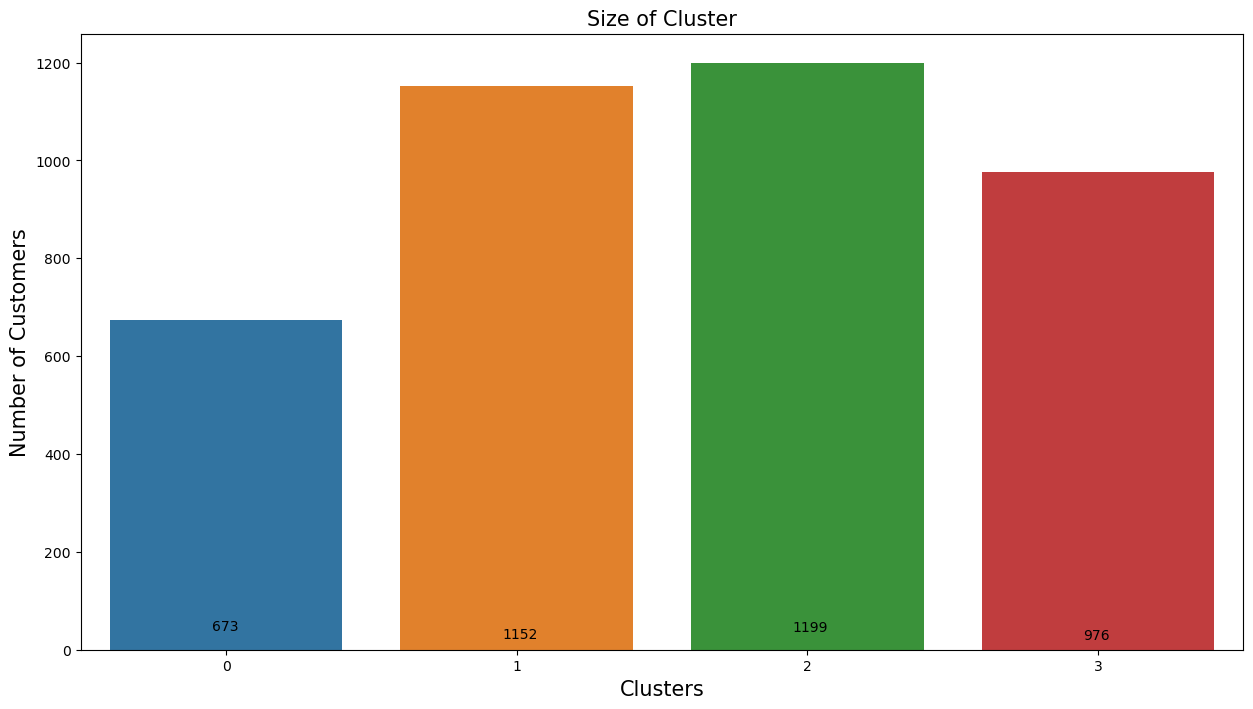

In [408]:
# use 'seaborn' library to plot a barplot for cluster size
sns.countplot(data= df_cluster, x = 'Cluster')

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Size of Cluster', fontsize = 15)
plt.xlabel('Clusters', fontsize = 15)
plt.ylabel('Number of Customers', fontsize = 15)

# add values in the graph
# 'x' and 'y' assigns the position to the text
# 's' represents the text on the plot
plt.text(x = -0.05, y =39, s = np.unique(new_clusters.labels_, return_counts=True)[1][0])
plt.text(x = 0.95, y =24, s = np.unique(new_clusters.labels_, return_counts=True)[1][1])
plt.text(x = 1.95, y =37, s = np.unique(new_clusters.labels_, return_counts=True)[1][2])
plt.text(x = 2.95, y =22, s = np.unique(new_clusters.labels_, return_counts=True)[1][3])


# display the plot
plt.show()

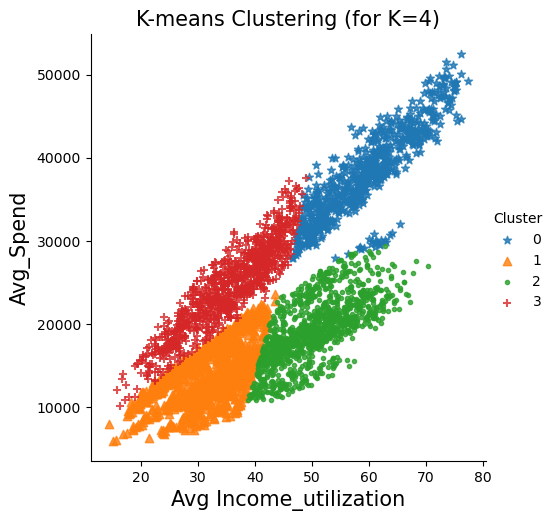

In [409]:
# plot the lmplot to visualize the clusters
# pass the different markers to display the points in each cluster with different shapes
# the 'hue' parameter returns colors for each cluster
sns.lmplot(x = 'avg_Income_utilization%', y = 'avg_mon_spends', data = df_cluster, hue = 'Cluster', 
                markers = ['*', '^', '.', '+'], fit_reg = False)

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('K-means Clustering (for K=4)', fontsize = 15)
plt.xlabel('Avg Income_utilization', fontsize = 15)
plt.ylabel('Avg_Spend', fontsize = 15)

# display the plot
plt.show()

In [341]:
# there will be one more with people with total_spent more that 250000, as we removed them for cluster analysis as the system identified them as outliers. But they can be our best fit for credit card customers because there income utilization is higher as compare to average poeple.

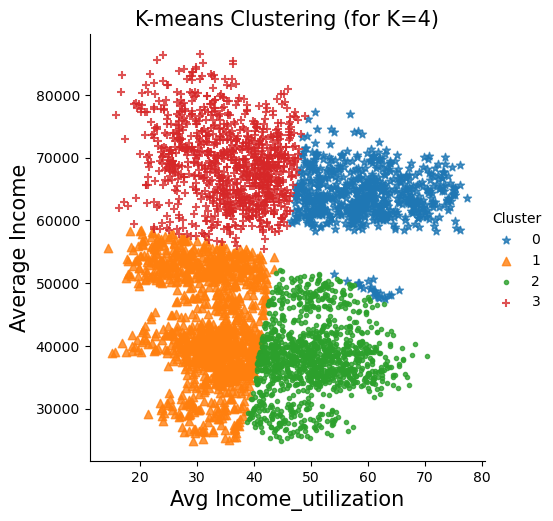

In [410]:
# plot the lmplot to visualize the clusters
# pass the different markers to display the points in each cluster with different shapes
# the 'hue' parameter returns colors for each cluster
sns.lmplot(x = 'avg_Income_utilization%', y = 'avg_income', data = df_cluster, hue = 'Cluster', 
                markers = ['*', '^', '.', '+'], fit_reg = False)

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('K-means Clustering (for K=4)', fontsize = 15)

plt.xlabel('Avg Income_utilization', fontsize = 15)
plt.ylabel('Average Income', fontsize = 15)

# display the plot
plt.show()

In [411]:
#Cluster 1
# size of a cluster 1
len(df_cluster[df_cluster['Cluster'] == 0])

673

In [412]:
# statistical summary of the numerical variables
df_cluster[df_cluster.Cluster==0].describe()

,avg_income,avg_mon_spends,avg_Income_utilization%,Cluster
count,673.000000,673.000000,673.000000,673.000000
mean,63952.974740,37942.640168,59.358451,0.000000
std,4325.906314,5344.429111,7.515292,0.000000
min,47507.000000,27874.833333,46.547901,0.000000
25%,61626.000000,33977.166667,52.838088,0.000000
50%,63807.000000,37630.833333,59.086160,0.000000
75%,66468.000000,42123.333333,64.370137,0.000000
max,77300.000000,52533.500000,77.374984,0.000000


In [413]:
# summary of the categorical variable
df_cluster[df_cluster.Cluster==0].describe(include = object)

,customer_id,age_group,city,occupation,gender,marital status
count,673,673,673,673,673,673
unique,673,4,5,2,2,2
top,ATQCUS2640,25-34,Mumbai,Salaried IT Employees,Male,Married
freq,1,316,278,668,432,570


Interpretation: The above summary shows that the average yearly income of the customers in this cluster is 68456.05. On average, their total spent is 139901.54 and so their Income Utilzation is 2.5 and the average age is 32 years. 
    Here mostly the people are male,married ,Bussiness Owners from Chennai with ages between 25-34.

# Cluster 2

In [414]:
# size of a cluster 2
len(df_cluster[df_cluster['Cluster'] == 1])

1152

In [415]:
# statistical summary of the numerical variables
df_cluster[df_cluster.Cluster==1].describe()

,avg_income,avg_mon_spends,avg_Income_utilization%,Cluster
count,1152.000000,1152.000000,1152.000000,1152.000000
mean,43537.345486,13885.518808,32.104429,1.000000
std,8151.226318,3291.373029,5.625720,0.000000
min,24816.000000,5877.500000,14.290724,1.000000
25%,37917.500000,11577.166667,28.379927,1.000000
50%,41886.000000,13570.750000,33.120995,1.000000
75%,51610.250000,16066.250000,36.328487,1.000000
max,58520.000000,23618.833333,43.538625,1.000000


In [416]:
# summary of the categorical variable
df_cluster[df_cluster.Cluster==1].describe(include = object)

,customer_id,age_group,city,occupation,gender,marital status
count,1152,1152,1152,1152,1152,1152
unique,1152,4,5,5,2,2
top,ATQCUS0663,25-34,Chennai,Salaried Other Employees,Male,Married
freq,1,395,499,399,671,840


Interpretation: This clusters are having 1131 customers who are mostly Male amd married and of age between 35-45 . customers are mostly freelancers from Mumbai.
There income utlization is more i.e 3.04 as there average total spent is 117903.82 and average avg_income is 38840.13

# CLuster 3

In [417]:
# size of a cluster 3
len(df_cluster[df_cluster['Cluster'] == 2])

1199

In [418]:
# statistical summary of the numerical variables
df_cluster[df_cluster.Cluster==2].describe()

,avg_income,avg_mon_spends,avg_Income_utilization%,Cluster
count,1199.000000,1199.000000,1199.000000,1199.000000
mean,38209.722269,19255.121351,50.271937,2.000000
std,5724.890089,3880.742216,6.176502,0.000000
min,24888.000000,10833.833333,38.758705,2.000000
25%,34988.500000,16596.166667,45.002686,2.000000
50%,38027.000000,19208.666667,49.962076,2.000000
75%,41120.000000,21933.750000,54.402629,2.000000
max,52111.000000,29390.166667,70.377655,2.000000


In [419]:
# summary of the categorical variable
df_cluster[df_cluster.Cluster==2].describe(include = object)

,customer_id,age_group,city,occupation,gender,marital status
count,1199,1199,1199,1199,1199,1199
unique,1199,4,5,4,2,2
top,ATQCUS0809,25-34,Mumbai,Freelancers,Male,Married
freq,1,404,488,538,852,844


Interpretation: This clusters has 641 customers with high Income utilization average of 3.22 because there average avg_income is 64573.85 and average totoal_spent is 206837.9.
    These customers are mostly Salaried IT employees ,Male ,Married of age between 25-34 and 35% of customers are form Mumbai.

# CLuster 4

In [420]:
# size of a cluster 5
len(df_cluster[df_cluster['Cluster'] == 3])

976

In [421]:
# statistical summary of the numerical variables
df_cluster[df_cluster.Cluster==3].describe()

,avg_income,avg_mon_spends,avg_Income_utilization%,Cluster
count,976.000000,976.000000,976.000000,976.000000
mean,69282.067623,24451.387466,35.433893,3.000000
std,6157.529955,5005.497021,7.170048,0.000000
min,55384.000000,10085.500000,15.762757,3.000000
25%,64542.500000,20915.833333,29.982873,3.000000
50%,69080.000000,24653.000000,35.987200,3.000000
75%,73318.000000,28127.958333,41.471605,3.000000
max,86600.000000,37499.333333,48.904307,3.000000


In [422]:
# summary of the categorical variables
df_cluster[df_cluster.Cluster==4].describe(include = object)

,customer_id,age_group,city,occupation,gender,marital status
count,0,0,0,0,0,0
unique,0,0,0,0,0,0
top,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN


Interpretation: This cluster is the buiggest one with 1179 of customers . These customers are mostly from Chennai,of age between 25-34,mostly Male amd married Salaried Other Employees.
    The average income is 42407.05 with average of total spent is 80342.106 with less income Utilization of average 1.92.

###### 

# Building Cluster  with K=6

In [423]:
# build a K-Means model with 6 clusters
new_clusters = KMeans(n_clusters = 6, random_state = 10)

# fit the model
new_clusters.fit(df_numerical_scaled)

# append the cluster label for each point in the dataframe 'df_cust'
df_cluster['Cluster'] = new_clusters.labels_

In [424]:
df_cluster.head()

,customer_id,age_group,city,occupation,gender,marital status,avg_income,avg_mon_spends,avg_Income_utilization%,Cluster
0,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,32400.666667,44.068749,2
1,ATQCUS0809,25-34,Hyderabad,Salaried Other Employees,Male,Married,39922,16518.666667,41.377353,4
2,ATQCUS0663,25-34,Chennai,Salaried Other Employees,Male,Married,37702,11517.000000,30.547451,4
3,ATQCUS0452,25-34,Delhi NCR,Government Employees,Male,Married,54090,20384.833333,37.686880,0
4,ATQCUS3350,21-24,Bengaluru,Freelancers,Male,Single,28376,12251.000000,43.173809,4


In [425]:
df_cluster.Cluster.value_counts()

1    936
4    913
2    657
0    565
3    472
5    457
Name: Cluster, dtype: int64

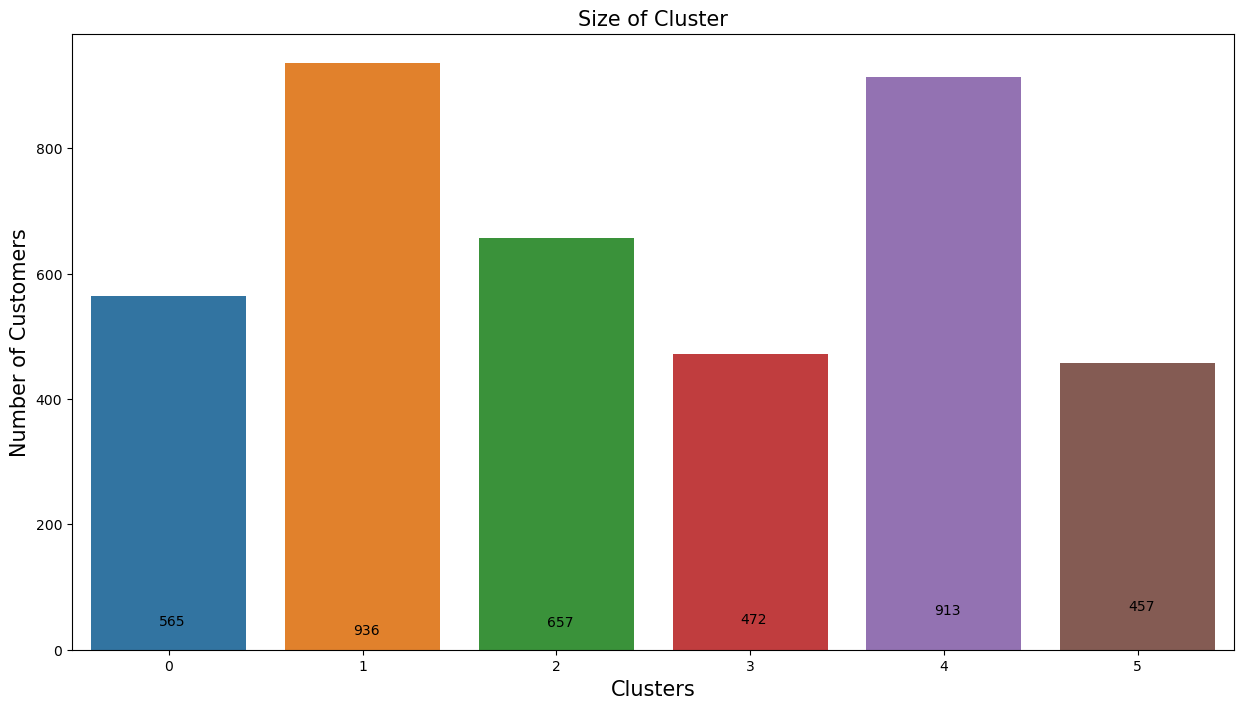

In [426]:
# use 'seaborn' library to plot a barplot for cluster size
sns.countplot(data=df_cluster, x = 'Cluster')

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Size of Cluster', fontsize = 15)
plt.xlabel('Clusters', fontsize = 15)
plt.ylabel('Number of Customers', fontsize = 15)

# add values in the graph
# 'x' and 'y' assigns the position to the text
# 's' represents the text on the plot
plt.text(x = -0.05, y =39, s = np.unique(new_clusters.labels_, return_counts=True)[1][0])
plt.text(x = 0.95, y =24, s = np.unique(new_clusters.labels_, return_counts=True)[1][1])
plt.text(x = 1.95, y =37, s = np.unique(new_clusters.labels_, return_counts=True)[1][2])
plt.text(x = 2.95, y =42, s = np.unique(new_clusters.labels_, return_counts=True)[1][3])
plt.text(x = 3.95, y =57, s = np.unique(new_clusters.labels_, return_counts=True)[1][4])
plt.text(x = 4.95, y =62, s = np.unique(new_clusters.labels_, return_counts=True)[1][5])
# display the plot
plt.show()

# cluster 1 is the biggect cluster 
# now we will analyze the clusters

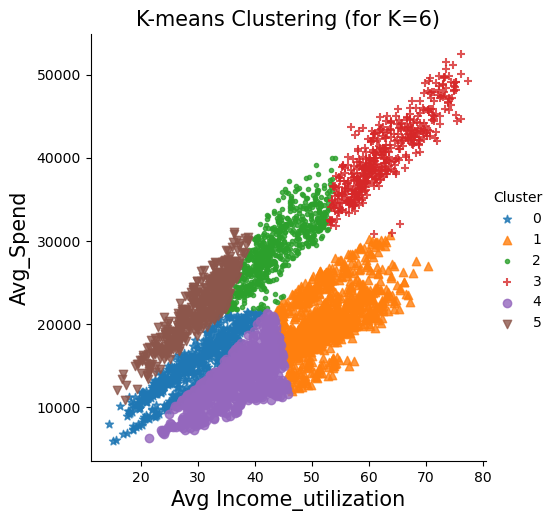

In [427]:
# plot the lmplot to visualize the clusters
# pass the different markers to display the points in each cluster with different shapes
# the 'hue' parameter returns colors for each cluster
sns.lmplot(x = 'avg_Income_utilization%', y = 'avg_mon_spends', data = df_cluster, hue = 'Cluster', 
                markers = ['*', '^', '.', '+','o','v'], fit_reg = False)

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('K-means Clustering (for K=6)', fontsize = 15)
plt.xlabel('Avg Income_utilization', fontsize = 15)
plt.ylabel('Avg_Spend', fontsize = 15)

# display the plot
plt.show()

In [136]:
# there will be one more with people with total_spent more that 250000, as we removed them for cluster analysis as the system identified them as outliers. But they can be our best fit for credit card customers because there income utilization is higher as compare to average poeple.

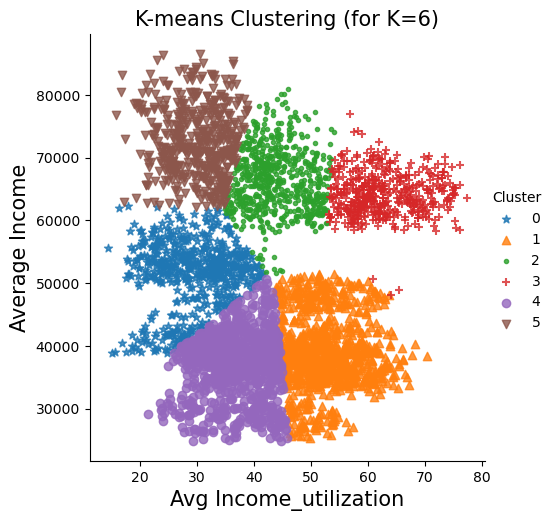

In [428]:
# plot the lmplot to visualize the clusters
# pass the different markers to display the points in each cluster with different shapes
# the 'hue' parameter returns colors for each cluster
sns.lmplot(x = 'avg_Income_utilization%', y = 'avg_income', data = df_cluster, hue = 'Cluster', 
                markers = ['*', '^', '.', '+','o','v'], fit_reg = False)

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('K-means Clustering (for K=6)', fontsize = 15)
plt.xlabel('Avg Income_utilization', fontsize = 15)
plt.ylabel('Average Income', fontsize = 15)

# display the plot
plt.show()

In [429]:
#Cluster 1
# size of a cluster 1
len(df_cluster[df_cluster['Cluster'] == 0])

565

In [430]:
# statistical summary of the numerical variables
df_cluster[df_cluster.Cluster==0].describe()

,avg_income,avg_mon_spends,avg_Income_utilization%,Cluster
count,565.000000,565.000000,565.000000,565.000000
mean,51562.304425,15178.657227,29.356474,0.000000
std,5211.189430,3552.455391,5.966488,0.000000
min,38867.000000,5877.500000,14.290724,0.000000
25%,49549.000000,12431.166667,24.749735,0.000000
50%,52538.000000,15228.000000,29.175711,0.000000
75%,54685.000000,17965.000000,34.171948,0.000000
max,62341.000000,21669.666667,41.517748,0.000000


In [431]:
# summary of the categorical variable
df_cluster[df_cluster.Cluster==0].describe(include = object)

,customer_id,age_group,city,occupation,gender,marital status
count,565,565,565,565,565,565
unique,565,4,5,5,2,2
top,ATQCUS0452,25-34,Chennai,Government Employees,Male,Married
freq,1,205,189,344,315,402


Interpretation: The above summary shows that the average yearly income of the customers in this cluster is 68456.05. On average, their total spent is 139901.54 and so their Income Utilzation is 2.5 and the average age is 32 years. 
    Here mostly the people are male,married ,Bussiness Owners from Chennai with ages between 25-34.

# Cluster 2

In [432]:
# size of a cluster 2
len(df_cluster[df_cluster['Cluster'] == 1])

936

In [433]:
# statistical summary of the numerical variables
df_cluster[df_cluster.Cluster==1].describe()

,avg_income,avg_mon_spends,avg_Income_utilization%,Cluster
count,936.000000,936.000000,936.000000,936.000000
mean,39158.744658,20668.664530,52.786943,1.000000
std,5673.194648,3565.139094,5.131147,0.000000
min,25289.000000,11924.333333,43.801369,1.000000
25%,35517.750000,18353.041667,48.806483,1.000000
50%,38594.000000,20421.583333,52.040163,1.000000
75%,42172.250000,22925.666667,56.298102,1.000000
max,51509.000000,30734.333333,70.377655,1.000000


In [434]:
# summary of the categorical variable
df_cluster[df_cluster.Cluster==1].describe(include = object)

,customer_id,age_group,city,occupation,gender,marital status
count,936,936,936,936,936,936
unique,936,4,4,3,2,2
top,ATQCUS3256,35-45,Mumbai,Freelancers,Male,Married
freq,1,332,459,402,712,660


Interpretation: This clusters are having 1131 customers who are mostly Male amd married and of age between 35-45 . customers are mostly freelancers from Mumbai.
There income utlization is more i.e 3.04 as there average total spent is 117903.82 and average avg_income is 38840.13

# CLuster 3

In [435]:
# size of a cluster 3
len(df_cluster[df_cluster['Cluster'] == 2])

657

In [436]:
# statistical summary of the numerical variables
df_cluster[df_cluster.Cluster==2].describe()

,avg_income,avg_mon_spends,avg_Income_utilization%,Cluster
count,657.000000,657.000000,657.000000,657.000000
mean,66377.992390,29223.331811,44.028765,2.000000
std,4995.960786,3792.753405,4.743695,0.000000
min,51695.000000,21508.833333,34.891525,2.000000
25%,62756.000000,26500.000000,40.367822,2.000000
50%,66169.000000,29254.000000,43.385792,2.000000
75%,69783.000000,31873.000000,47.965030,2.000000
max,80917.000000,40017.833333,53.989144,2.000000


In [437]:
# summary of the categorical variable
df_cluster[df_cluster.Cluster==2].describe(include = object)

,customer_id,age_group,city,occupation,gender,marital status
count,657,657,657,657,657,657
unique,657,4,5,3,2,2
top,ATQCUS1825,25-34,Chennai,Salaried IT Employees,Male,Married
freq,1,320,145,461,421,577


Interpretation: This clusters has 641 customers with high Income utilization average of 3.22 because there average avg_income is 64573.85 and average totoal_spent is 206837.9.
    These customers are mostly Salaried IT employees ,Male ,Married of age between 25-34 and 35% of customers are form Mumbai.

# CLuster 4

In [438]:
# size of a cluster 4
len(df_cluster[df_cluster['Cluster'] == 3])

472

In [439]:
# statistical summary of the numerical variables
df_cluster[df_cluster.Cluster==3].describe()

,avg_income,avg_mon_spends,avg_Income_utilization%,Cluster
count,472.000000,472.000000,472.000000,472.000000
mean,64186.036017,40325.822387,62.823533,3.000000
std,3376.435204,4373.660462,5.934752,0.000000
min,48205.000000,30855.333333,53.139363,3.000000
25%,61877.500000,37125.083333,58.245902,3.000000
50%,63926.000000,39748.583333,61.729697,3.000000
75%,66363.750000,43328.750000,67.325182,3.000000
max,76952.000000,52533.500000,77.374984,3.000000


In [440]:
# summary of the categorical variables
df_cluster[df_cluster.Cluster==3].describe(include = object)

,customer_id,age_group,city,occupation,gender,marital status
count,472,472,472,472,472,472
unique,472,4,4,1,2,2
top,ATQCUS3943,35-45,Mumbai,Salaried IT Employees,Male,Married
freq,1,234,237,472,323,408


Interpretation: This is the targeted cluster with customer having maximum Average Income Utlization% i.e 77.37

# CLuster 5

In [441]:
# size of a cluster 4
len(df_cluster[df_cluster['Cluster'] == 4])

913

In [442]:
# statistical summary of the numerical variables
df_cluster[df_cluster.Cluster==4].describe()

,avg_income,avg_mon_spends,avg_Income_utilization%,Cluster
count,913.000000,913.000000,913.000000,913.000000
mean,37014.840088,13629.811428,36.779747,4.000000
std,5196.816805,2781.585874,5.154159,0.000000
min,24816.000000,6275.000000,21.472813,4.000000
25%,34006.000000,11794.500000,33.118096,4.000000
50%,37883.000000,13513.666667,36.812337,4.000000
75%,40550.000000,15628.333333,41.377353,4.000000
max,50695.000000,21374.166667,45.837450,4.000000


In [443]:
# summary of the categorical variables
df_cluster[df_cluster.Cluster==4].describe(include = object)

,customer_id,age_group,city,occupation,gender,marital status
count,913,913,913,913,913,913
unique,913,4,5,4,2,2
top,ATQCUS0809,25-34,Chennai,Salaried Other Employees,Male,Married
freq,1,279,329,474,534,669


# Cluster 6

In [444]:
# size of a cluster 4
len(df_cluster[df_cluster['Cluster'] == 5])

457

In [445]:
# statistical summary of the numerical variables
df_cluster[df_cluster.Cluster==5].describe()

,avg_income,avg_mon_spends,avg_Income_utilization%,Cluster
count,457.000000,457.000000,457.000000,457.000000
mean,72521.100656,21627.161561,29.841510,5.000000
std,5509.277175,3823.069297,4.822731,0.000000
min,62170.000000,10841.166667,15.762757,5.000000
25%,68475.000000,18793.833333,26.338908,5.000000
50%,71928.000000,21712.333333,30.350742,5.000000
75%,76796.000000,24263.666667,33.896230,5.000000
max,86600.000000,31026.500000,38.794807,5.000000


In [446]:
# summary of the categorical variables
df_cluster[df_cluster.Cluster==5].describe(include = object)

,customer_id,age_group,city,occupation,gender,marital status
count,457,457,457,457,457,457
unique,457,3,5,3,2,2
top,ATQCUS3008,45+,Chennai,Business Owners,Male,Married
freq,1,200,171,361,292,420


In [ ]:
# exporting the customer details with all their information so that we can approach them for presenting our new credit card features

In [447]:
df_target_cust = df_cluster[df_cluster.Cluster==3]
print(df_target_cust.head())

   customer_id age_group       city             occupation  gender  \
16  ATQCUS3943     25-34  Delhi NCR  Salaried IT Employees  Female   
22  ATQCUS0916     35-45     Mumbai  Salaried IT Employees    Male   
40  ATQCUS0172     25-34     Mumbai  Salaried IT Employees    Male   
48  ATQCUS0917     35-45     Mumbai  Salaried IT Employees    Male   
49  ATQCUS0891     35-45     Mumbai  Salaried IT Employees    Male   

   marital status  avg_income  avg_mon_spends  avg_Income_utilization%  \
16         Single       60269    35030.666667                58.123856   
22        Married       63264    46742.333333                73.884568   
40        Married       62524    43823.166667                70.090152   
48        Married       62891    44973.166667                71.509702   
49        Married       64672    45917.333333                71.000330   

    Cluster  
16        3  
22        3  
40        3  
48        3  
49        3  


In [448]:
df_target_cust.to_excel('target_customer.xlsx', index=True)